In [ ]:
from google.colab import drive
drive.mount("/content/fraudulent_credit_card")

Mounted at /content/fraudulent_credit_card


Importing the necessary libraries

Explanation of Each Library and Its Purpose:

1.NumPy (np):
Purpose: Provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

2.Pandas (pd):
Purpose: Offers data structures and data analysis tools. It is used for manipulating numerical tables and time series data.

3.Time:
Purpose: Provides various time-related functions.

4.Matplotlib (plt):
Purpose: A plotting library used for creating static, animated, and interactive visualizations in Python.

5.Seaborn (sns):
Purpose: A data visualization library based on Matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics.

6.SciPy (stats and special):
Purpose: Used for scientific and technical computing. The stats module contains a large number of probability distributions and statistical functions, while special contains many special mathematical functions.

7.Scikit-learn (sklearn):
Purpose: A machine learning library that provides simple and efficient tools for data mining and data analysis. It is built on NumPy, SciPy, and Matplotlib.

Key Modules:
1.preprocessing: Tools for pre-processing and transforming data.
2.Standards: Standardizes features by removing the mean and scaling to unit variance.
3.metrics: Metrics and scoring functions for evaluating models.
4.model_selection: Tools for model selection, validation, and hyperparameter tuning.
5.linear_model: Implements various linear models like Ridge, Lasso, and Logistic Regression.
6.neighbors: Implements the k-nearest neighbors algorithm.
tree: Implements decision tree algorithms.
7.ensemble: Implements ensemble methods like AdaBoost and RandomForest.


8XGBoost (xgb):
Purpose: An optimized distributed gradient boosting library designed to be highly efficient, flexible, and portable. It implements machine learning algorithms under the Gradient Boosting framework.

Key Functions:
XGBClassifier: An implementation of the gradient boosting decision tree classifier.
plot_importance: A function to plot the feature importances from an XGBoost model.

9.Warnings:
Purpose: Provides a way to filter out warnings, allowing you to suppress unwanted warning messages to keep the output clean.

In [ ]:
import numpy as np
import pandas as pd
import time

# Matplotlib for plotting
import matplotlib.pyplot as plt
# Seaborn for statistical data visualization
import seaborn as sns
# Ensure plots appear inline in Jupyter notebooks
%matplotlib inline

# SciPy for scientific and technical computing
from scipy import stats
# Specific functions from scipy.stats for statistical analysis
from scipy.stats import norm, skew, boxcox_normmax
# boxcox1p for Box-Cox power transformation
from scipy.special import boxcox1p

# Sklearn preprocessing for scaling and normalizing data
from sklearn import preprocessing
# StandardScaler for standardizing features
from sklearn.preprocessing import StandardScaler

# Sklearn metrics for evaluating model performance
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

# Sklearn model selection for splitting data and hyperparameter tuning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Sklearn linear models for regression and classification
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
# KNeighborsClassifier for k-nearest neighbors classification
from sklearn.neighbors import KNeighborsClassifier
# LogisticRegressionCV for logistic regression with cross-validation
from sklearn.linear_model import LogisticRegressionCV
# DecisionTreeClassifier for decision tree classification
from sklearn.tree import DecisionTreeClassifier
# Ensemble methods for boosting and bagging
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# XGBoost for gradient boosting
import xgboost as xgb
from xgboost import XGBClassifier
# Function to plot feature importances in XGBoost
from xgboost import plot_importance

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Loading the data
df=pd.read_csv("/content/fraudulent_credit_card/MyDrive/Share creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:

#checking the shape
df.shape

(284807, 31)

In [ ]:
#checking the data types and null/non_null distribution
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#checking on the count,mean,std,min,max and percentiles
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#creating class distribution of the target variable
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [ ]:
# Checking the class distribution of the target variable in %

# Group the DataFrame 'df' by the 'Class' column and count the occurrences of each class
class_counts = df.groupby("Class")["Class"].count()
# Print the count of each class
print(class_counts)

# Calculate the percentage of each class
# Divide the count of each class by the total number of rows in the 'Class' column, then multiply by 100 to get the percentage
class_percentage = (class_counts / df["Class"].count()) * 100
# Print the percentage distribution of each class
print(class_percentage)

Class
0    284315
1       492
Name: Class, dtype: int64
Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


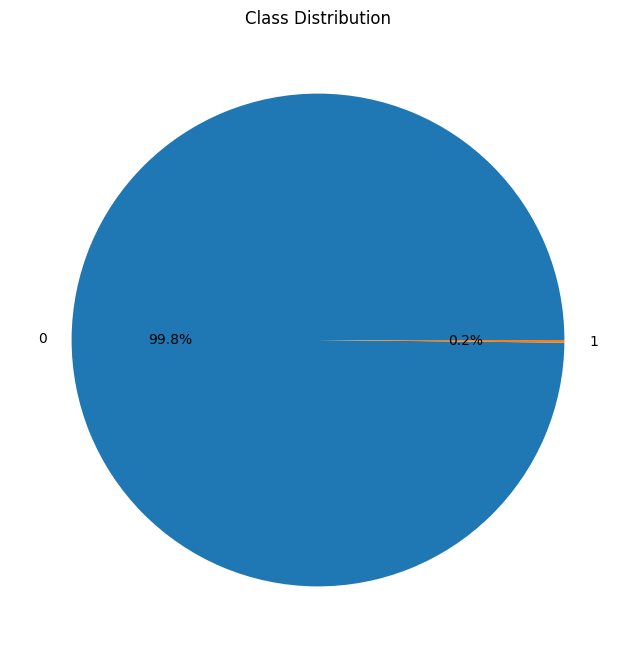

In [ ]:
class_percentage.plot.pie(autopct='%1.1f%%', figsize=(8, 8), title='Class Distribution')
plt.ylabel('') # This hides the y-label
plt.show()

99.82725143693798
0.1727485630620034


<Axes: xlabel='Class', ylabel='count'>

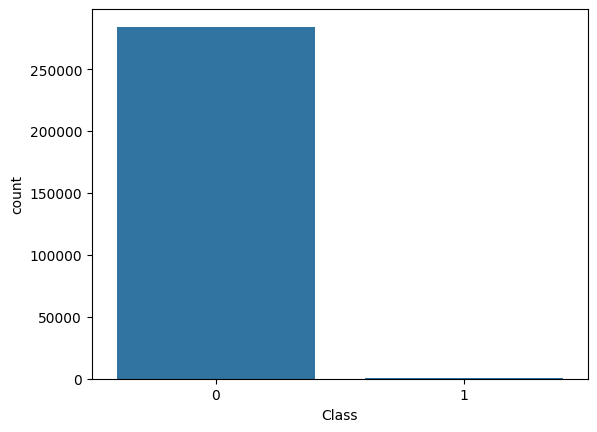

In [ ]:
#checking the % distribution of the Normal VS  fraudulent
classes=df["Class"].value_counts()
normal_share=classes[0]/df["Class"].count()*100
fraud_share=classes[1]/df["Class"].count()*100
print(normal_share)
print(fraud_share)
sns.barplot(data=classes)

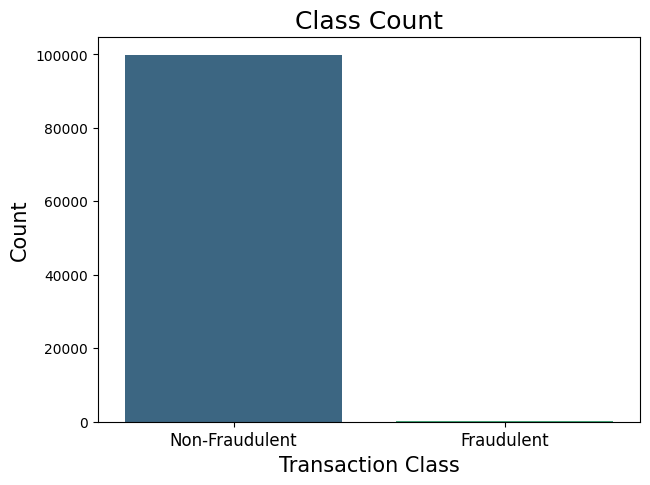

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'Class' column contains the labels for fraudulent (1) and non-fraudulent (0) transactions

# If df is very large, consider sampling a subset
if len(df) > 100000:  # Adjust the threshold as needed
    df_sample = df.sample(n=100000, random_state=1)
else:
    df_sample = df

plt.figure(figsize=(7, 5))
sns.countplot(x="Class", data=df_sample, palette="viridis")
plt.title("Class Count", fontsize=18)
plt.xlabel("Transaction Class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(ticks=[0, 1], labels=["Non-Fraudulent", "Fraudulent"], fontsize=12)
plt.show()

In [ ]:
#checking correlation
Corr=df.corr()
Corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


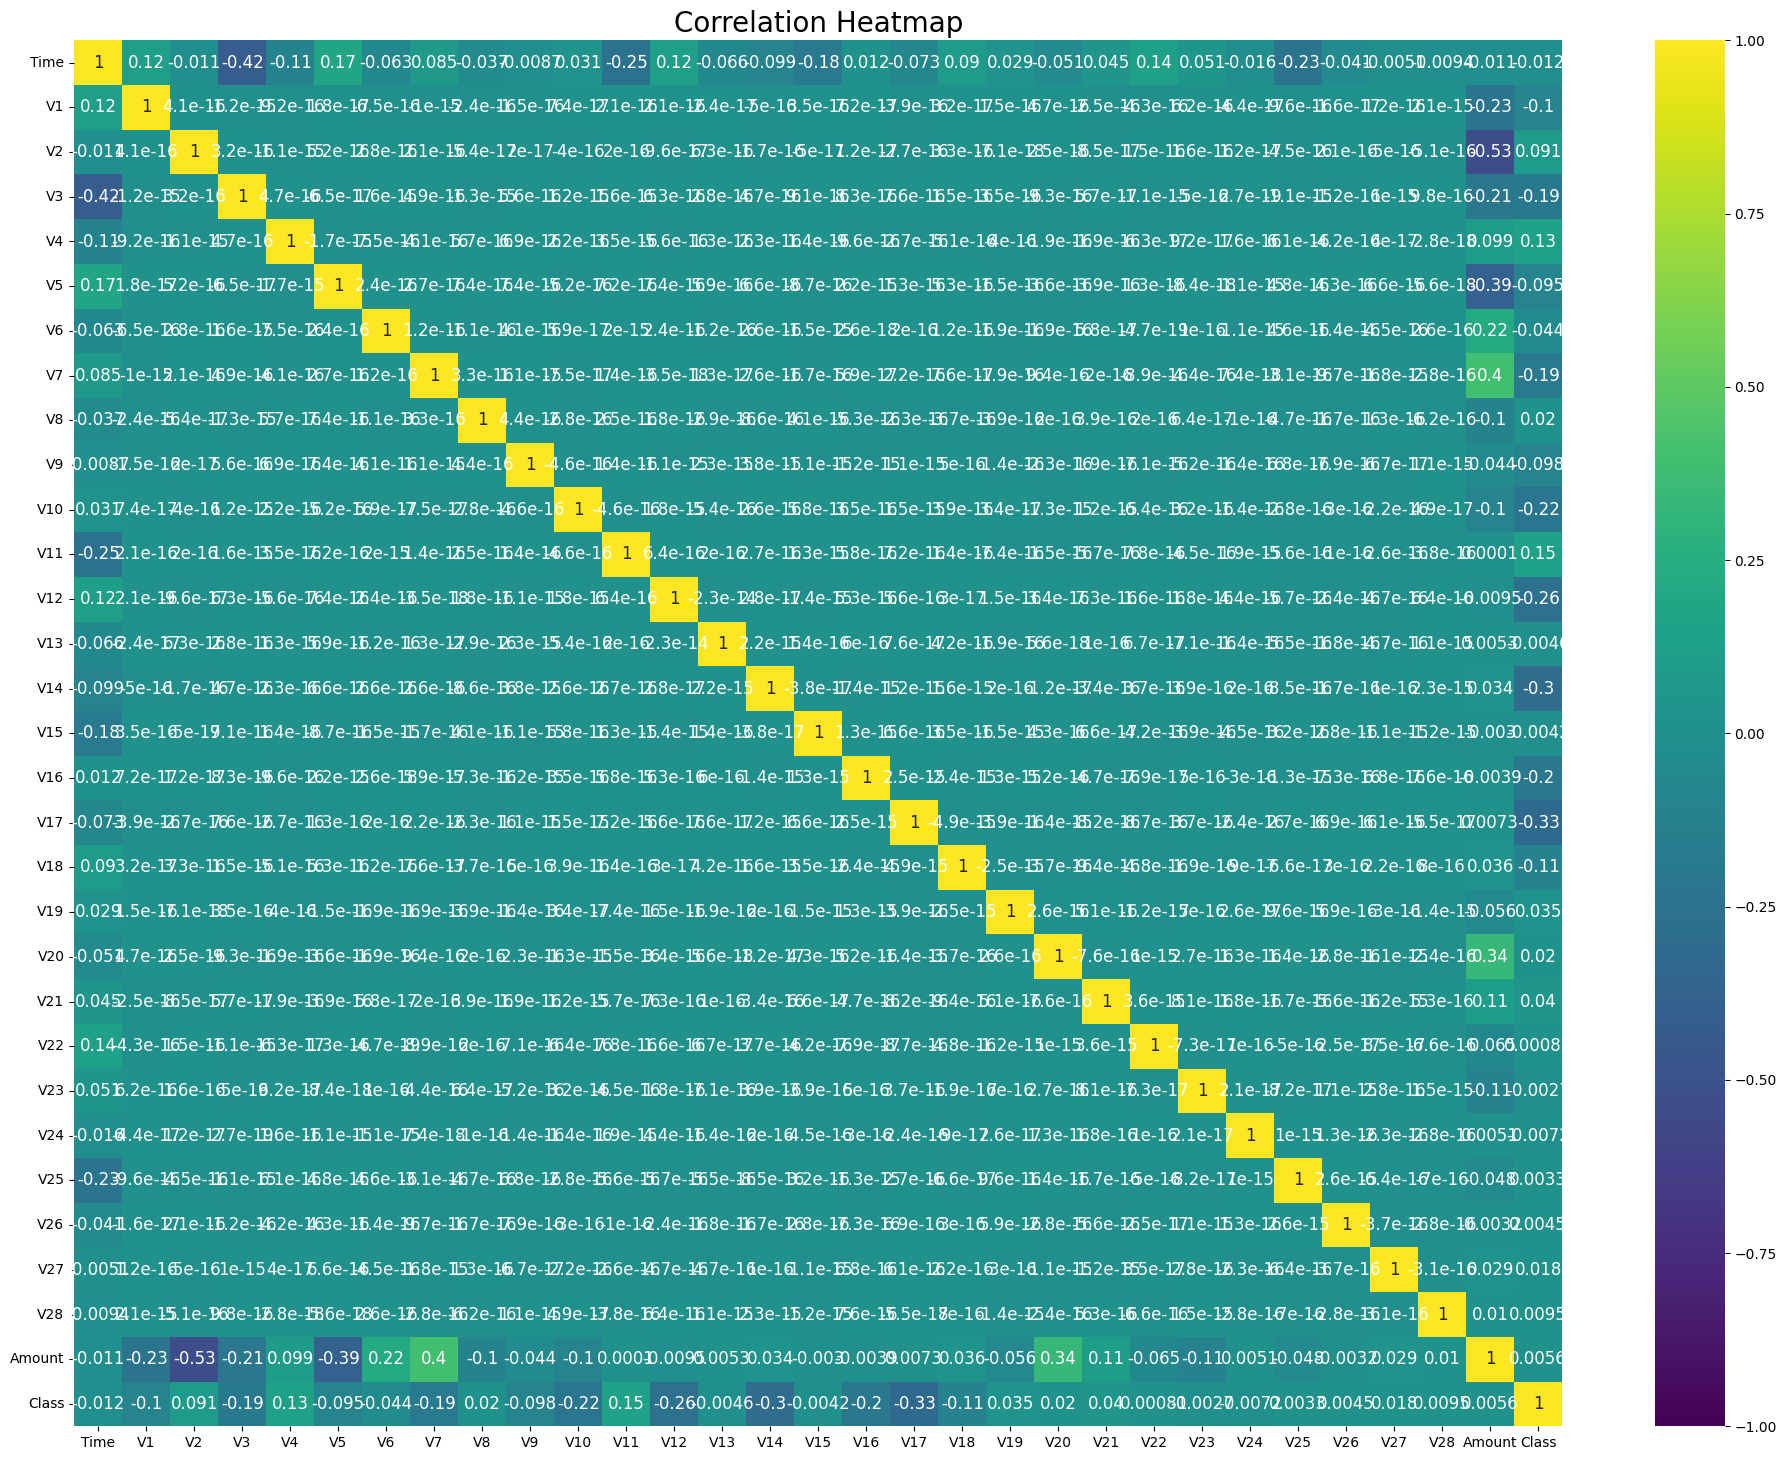

In [ ]:
plt.figure(figsize=(24, 18))
sns.heatmap(Corr, cmap="viridis", annot=True, annot_kws={"size": 12}, vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontsize=20)
plt.show()


# Generate a heatmap with the correlation matrix 'Corr'
#sns.heatmap(
    #Corr,  # The correlation matrix to visualize
    #cmap="viridis",  # Set the color scheme to 'viridis'
    #annot=True,  # Annotate each cell with the correlation value
    #vmin=-1,  # Set the minimum value for the color scale to -1
    #vmax=1,  # Set the maximum value for the color scale to 1
    #annot_kws={"size": 10}  # Set the annotation text size to 10
#)

#plt.title("Correlation Heatmap", fontsize=20)  # Add a title to the heatmap with a font size of 20
#plt.show()  # Display the plot#

In [ ]:
Delta_Time = pd.to_timedelta(df["Time"], unit="s")  # Convert the 'Time' column from seconds to a timedelta object
# 'pd.to_timedelta()' is a function from the pandas library that converts a Series (or scalar, array-like) of values to a timedelta type.
# 'df["Time"]' is selecting the 'Time' column from the DataFrame 'df'.
# 'unit="s"' specifies that the values in the 'Time' column are in seconds, so they will be converted to a timedelta format representing seconds.

print(Delta_Time)  # Print the resulting timedelta Series
# This line outputs the 'Delta_Time' Series to the console, allowing you to see the converted timedelta values.

0        0 days 00:00:00
1        0 days 00:00:00
2        0 days 00:00:01
3        0 days 00:00:01
4        0 days 00:00:02
               ...      
284802   1 days 23:59:46
284803   1 days 23:59:47
284804   1 days 23:59:48
284805   1 days 23:59:48
284806   1 days 23:59:52
Name: Time, Length: 284807, dtype: timedelta64[ns]


In [ ]:
# Creating derived columns for day, hour, and minute components from the Delta_Time column

# Extract the day component from Delta_Time, convert it to an integer, and assign it to a new column 'Time_Day'
df["Time_Day"] = (Delta_Time.dt.components.days).astype(int)

# Extract the hour component from Delta_Time, convert it to an integer, and assign it to a new column 'Time_Hours'
df["Time_Hours"] = (Delta_Time.dt.components.hours).astype(int)

# Extract the minute component from Delta_Time, convert it to an integer, and assign it to a new column 'Time_Min'
df["Time_Min"] = (Delta_Time.dt.components.minutes).astype(int)

# Display the DataFrame to see the new derived columns
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,Time_Day,Time_Hours,Time_Min
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,1,23,59
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,1,23,59
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,1,23,59
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,1,23,59


In [ ]:
#Dropping unnecessary Columns
#Drop time as we have days, hours and min
df.drop(["Time"],axis=1, inplace=True)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,Amount,Class,Time_Day,Time_Hours,Time_Min
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,0,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,1,23,59
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,1,23,59
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,1,23,59
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,1,23,59


In [ ]:
#keep only derived column Hours , as day and min are not useful at the moment
df.drop(["Time_Day","Time_Min"],axis=1, inplace=True)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_Hours
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,23
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,23
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,23
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,23


In [ ]:
y=df.Class
X=df.drop(["Class"],axis=1)

In [ ]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hours
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [ ]:
# Import necessary library for splitting the dataset
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
# X and y are the features and target variable, respectively
# test_size=0.2 means 20% of the data will be used for testing
# train_size=0.8 means 80% of the data will be used for training (this is implicit if test_size is provided)
# random_state=100 ensures reproducibility of the split
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=100)

# Checking the spread of data post split
# np.sum(y) prints the total sum of the target variable in the entire dataset
print(np.sum(y))

# np.sum(y_train) prints the total sum of the target variable in the training set
print(np.sum(y_train))

# np.sum(y_test) prints the total sum of the target variable in the testing set
print(np.sum(y_test))

492
V1            7.286837e+00
V2            8.986756e+02
V3           -6.528676e+02
V4            4.379806e+02
V5            2.157077e+02
V6            1.392208e+01
V7            3.666098e+00
V8           -1.397782e+01
V9            3.629569e+02
V10           1.580144e+02
V11           1.391731e+02
V12           3.487528e+02
V13          -5.907352e+01
V14          -1.182467e+02
V15           7.929284e+01
V16          -5.769041e+01
V17           4.195622e+02
V18          -1.238187e+01
V19           1.119579e+02
V20          -7.187021e+01
V21           3.406802e+02
V22           1.174836e+02
V23           1.494223e+00
V24          -5.900090e+01
V25           1.092607e+02
V26           9.083036e+01
V27           2.294977e+01
V28           9.521106e+01
Amount        4.945149e+06
Time_Hours    7.984520e+05
dtype: float64
96


In [ ]:
#Accumulating all column names under one variable
Cols=list(X.columns.values)
Cols

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Time_Hours']

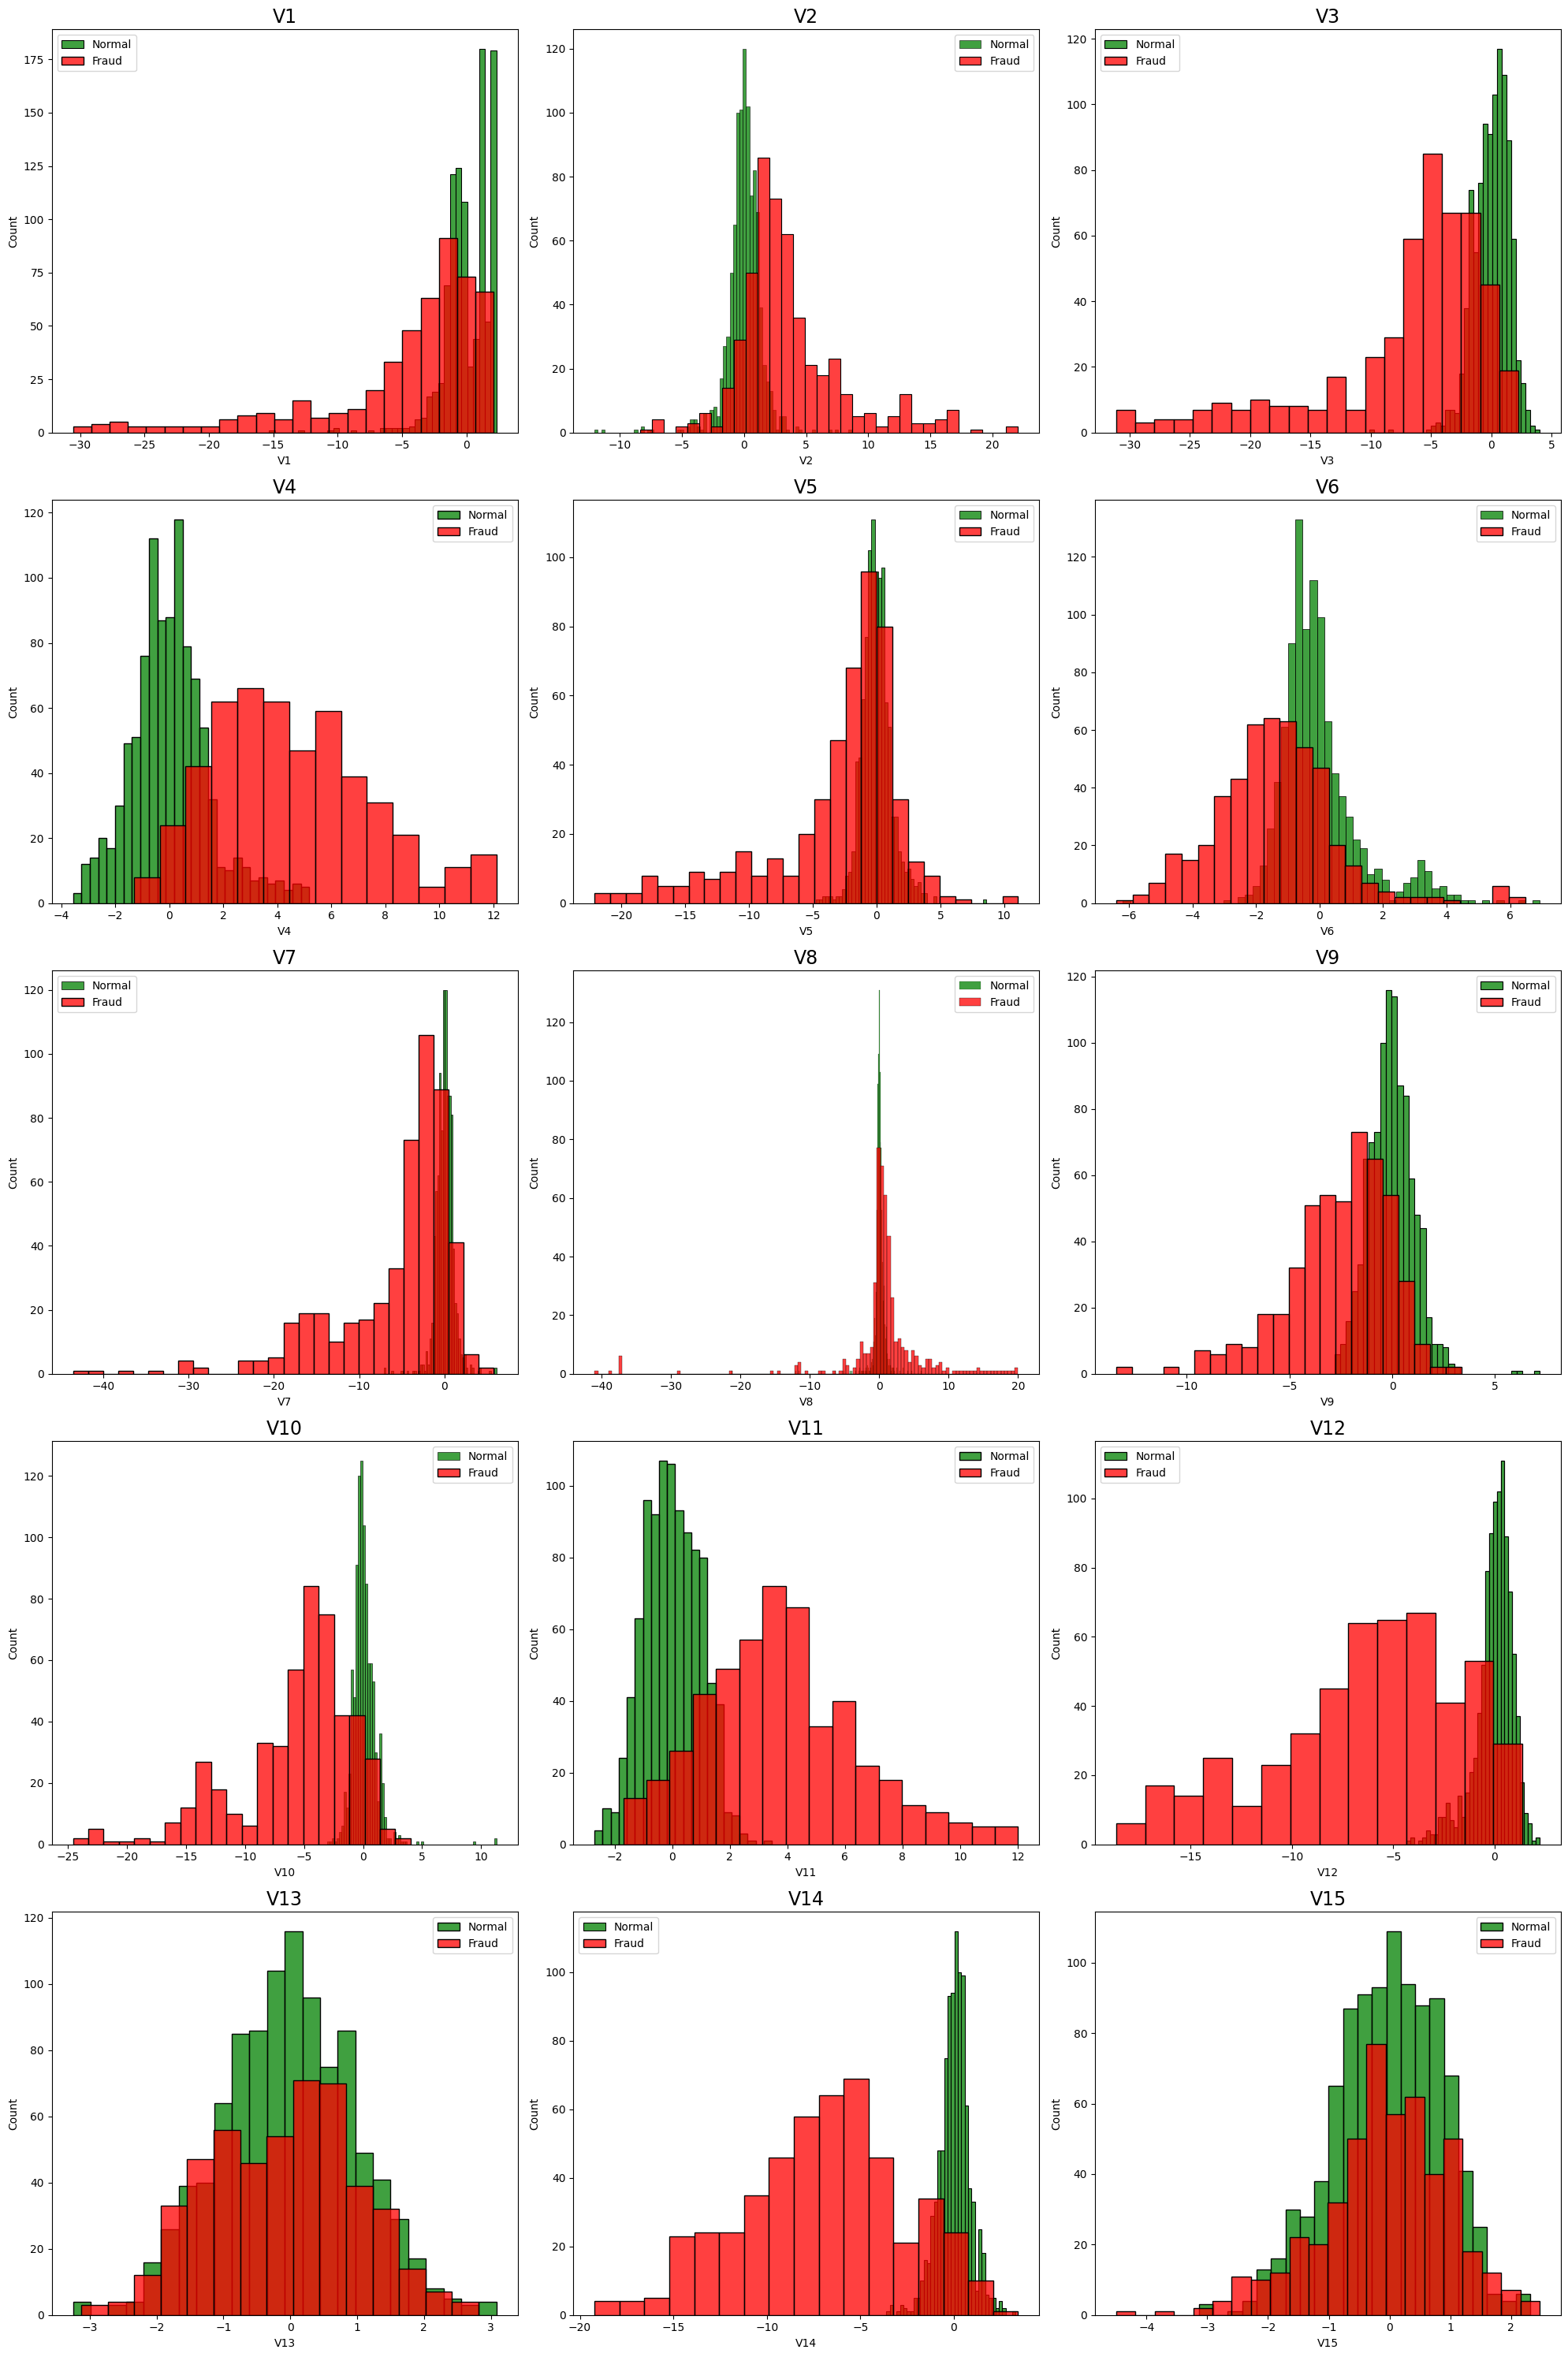

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create boolean masks to filter normal and fraud records
normal_records = df.Class == 0
fraud_records = df.Class == 1

# Sample 1000 records from normal and fraud datasets for efficiency, or all records if there are fewer than 1000
normal_sample = df[normal_records].sample(n=min(1000, normal_records.sum()), random_state=1)
# Samples up to 1000 normal records or all available records if fewer than 1000
fraud_sample = df[fraud_records].sample(n=min(1000, fraud_records.sum()), random_state=1)
# Samples up to 1000 fraud records or all available records if fewer than 1000

# Define a subset of columns to plot
subset_cols = Cols[:15]  # Select the first 15 columns from the list Cols to plot

# Set up the figure size for the plot
plt.figure(figsize=(20, 30))  # Create a figure with the specified size

# Loop through the selected columns and create a subplot for each
for n, col in enumerate(subset_cols):
    plt.subplot(5, 3, n + 1)  # Create a subplot in a 5x3 grid at position n + 1
    sns.histplot(normal_sample[col], color="green", kde=False, label='Normal')
    # Plot histogram of the normal sample for the current column with green color and no KDE
    sns.histplot(fraud_sample[col], color="red", kde=False, label='Fraud')
    # Plot histogram of the fraud sample for the current column with red color and no KDE
    plt.title(col, fontsize=17)  # Set the title of the subplot to the column name
    plt.legend()  # Add a legend to the subplot

# Adjust subplots to fit into the figure area
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()  # Display the figure

Model building

In [ ]:
#creating a dataframe
df_results=pd.DataFrame(columns=["Methodology","Model","Accuracy","roc_vlaue","threshold"])
df_results

,Methodology,Model,Accuracy,roc_vlaue,threshold


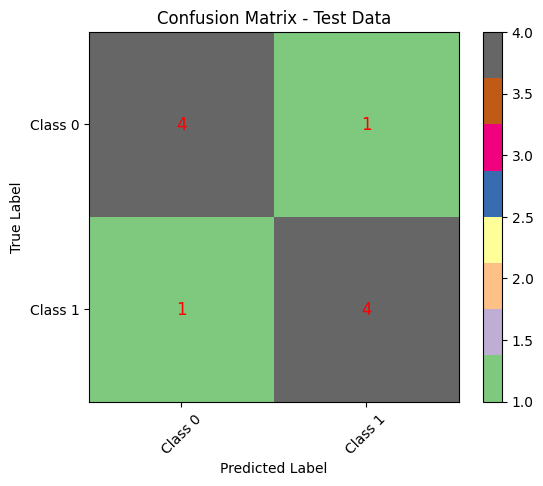

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, preds_test, category_names):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, preds_test)

    # Create a new figure
    plt.figure()

    # Display the confusion matrix using a colormap
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Accent)

    # Set the title of the plot
    plt.title("Confusion Matrix - Test Data")

    # Set the y-axis label
    plt.ylabel("True Label")

    # Set the x-axis label
    plt.xlabel("Predicted Label")

    # Create tick marks based on the number of categories
    ticks = np.arange(len(category_names))

    # Set x-axis tick labels with rotation for better readability
    plt.xticks(ticks, category_names, rotation=45)

    # Set y-axis tick labels
    plt.yticks(ticks, category_names)

    # Define labels for the confusion matrix cells
    labels = [["TN", "FP"], ["FN", "TP"]]

    # Loop through the confusion matrix to add text annotations
    for i in range(len(cm)):
        for j in range(len(cm)):
            # Add text at the center of each cell in the matrix
            plt.text(j, i, f"{cm[i][j]}", ha='center', va='center', fontsize=12, color="red")

    # Add a colorbar to the plot
    plt.colorbar()

    # Show the plot
    plt.show()

# Example data
y_test = [0, 0, 1, 1, 0, 1, 0, 1, 0, 1]
preds_test = [0, 0, 1, 1, 0, 0, 0, 1, 1, 1]
category_names = ["Class 0", "Class 1"]

# Plot the confusion matrix with the example data
plot_confusion_matrix(y_test, preds_test, category_names)

MODEL1

In [ ]:
import pandas as pd  # Importing pandas for DataFrame manipulation
from sklearn.linear_model import LogisticRegressionCV  # Importing LogisticRegressionCV for cross-validated logistic regression
from sklearn.model_selection import KFold  # Importing KFold for K-fold cross-validation
import numpy as np  # Importing numpy for array manipulations
from sklearn.datasets import make_classification  # Importing function to create a synthetic classification dataset
from sklearn.model_selection import train_test_split  # Importing function to split the dataset into training and testing sets

def build_and_run_logistic_models(df_results: pd.DataFrame, methodology: str,
                                  x_train: np.ndarray, x_test: np.ndarray,
                                  y_train: np.ndarray, y_test: np.ndarray) -> pd.DataFrame:
    """
    Fits and evaluates Logistic Regression models with L1 and L2 regularization.

    Args:
        df_results (pd.DataFrame): DataFrame to store results (optional).
        methodology (str): Name of the methodology for labeling results (optional).
        x_train (np.ndarray): Training features.
        x_test (np.ndarray): Testing features.
        y_train (np.ndarray): Training labels.
        y_test (np.ndarray): Testing labels.

    Returns:
        pd.DataFrame: DataFrame containing the results (if provided) or a new DataFrame.
    """

    # Ensure consistent shapes for X_train and y_train
    if x_train.shape[0] != y_train.shape[0]:
        raise ValueError("X_train and y_train must have the same number of samples.")

    # Ensure y_train and y_test are 1-dimensional arrays
    y_train = np.ravel(y_train)
    y_test = np.ravel(y_test)

    # Define parameters for cross-validation and regularization
    num_c = np.logspace(-4, 4, 10)  # Smaller range of regularization coefficients
    cv_num = KFold(n_splits=5, shuffle=True, random_state=42)  # Fewer K-Folds for quicker execution

    # Fit Logistic Regression with L2 regularization (Ridge)
    search_cv_l2 = LogisticRegressionCV(
        Cs=num_c,
        penalty='l2',
        scoring='roc_auc',
        cv=cv_num,
        random_state=42,
        max_iter=1000,  # Reduced number of iterations
        fit_intercept=True,
        solver='lbfgs',  # More efficient solver
        tol=1e-4
    )
    search_cv_l2.fit(x_train, y_train)

    # Fit Logistic Regression with L1 regularization (Lasso)
    search_cv_l1 = LogisticRegressionCV(
        Cs=num_c,
        penalty='l1',
        scoring='roc_auc',
        cv=cv_num,
        random_state=42,
        max_iter=1000,  # Reduced number of iterations
        fit_intercept=True,
        solver='liblinear',  # Efficient solver for L1
        tol=1e-4
    )
    search_cv_l1.fit(x_train, y_train)

    # Evaluate model performance
    l2_train_score = search_cv_l2.score(x_train, y_train)
    l2_test_score = search_cv_l2.score(x_test, y_test)
    l1_train_score = search_cv_l1.score(x_train, y_train)
    l1_test_score = search_cv_l1.score(x_test, y_test)

    # Add results to DataFrame (if provided)
    if df_results is not None:
        df_results.loc[methodology, 'L2 Train Score'] = l2_train_score
        df_results.loc[methodology, 'L2 Test Score'] = l2_test_score
        df_results.loc[methodology, 'L1 Train Score'] = l1_train_score
        df_results.loc[methodology, 'L1 Test Score'] = l1_test_score
    else:
        # Create a new DataFrame to store results
        df_results = pd.DataFrame({
            'Methodology': [methodology],
            'L2 Train Score': [l2_train_score],
            'L2 Test Score': [l2_test_score],
            'L1 Train Score': [l1_train_score],
            'L1 Test Score': [l1_test_score]
        })

    # Printing parameters and scores for L1 and L2 regularization
    print("Parameters for L1 regularization:")
    print(search_cv_l1.coef_)
    print("Intercept for L1 regularization:")
    print(search_cv_l1.intercept_)
    print("Scores for L1 regularization:")
    print(search_cv_l1.scores_)

    print("Parameters for L2 regularization:")
    print(search_cv_l2.coef_)
    print("Intercept for L2 regularization:")
    print(search_cv_l2.intercept_)
    print("Scores for L2 regularization:")
    print(search_cv_l2.scores_)

    return df_results

# Generate a synthetic dataset for demonstration
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an empty DataFrame to store results
df_results = pd.DataFrame()

# Define the methodology label
methodology = "Example Methodology"

# Call the function and capture the results
df_results = build_and_run_logistic_models(df_results, methodology, x_train, x_test, y_train, y_test)

# Display the resulting DataFrame
print(df_results)

Parameters for L1 regularization:
[[ 6.37362482e-02  0.00000000e+00  1.95880034e-01  6.54263088e-02
   0.00000000e+00  2.15120051e+00 -5.58407586e-02  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.61474499e-01  4.10539354e-01
   9.69043914e-04  9.13377053e-02 -1.29162799e-01  3.21841882e-02
   3.85826001e-02 -1.09991480e-01  0.00000000e+00  7.88834227e-02]]
Intercept for L1 regularization:
[0.09510123]
Scores for L1 regularization:
{1: array([[0.5       , 0.5       , 0.94139709, 0.94295984, 0.94436631,
        0.94092827, 0.94092827, 0.94092827, 0.94092827, 0.94092827],
       [0.5       , 0.5       , 0.92976116, 0.93054683, 0.93148963,
        0.93007542, 0.92928975, 0.92928975, 0.92928975, 0.92928975],
       [0.5       , 0.5       , 0.94226256, 0.9441402 , 0.9425755 ,
        0.93772493, 0.93694258, 0.93678611, 0.93678611, 0.93678611],
       [0.5       , 0.5       , 0.92933083, 0.9282364 , 0.92901814,
        0.9249531 , 0.9246404 , 0.92448405, 0.92448405, 0.92448405],
      

In [ ]:
def build_and_run_logistic_models(df_results: pd.DataFrame, methodology: str,
                                  x_train: np.ndarray, x_test: np.ndarray,
                                  y_train: np.ndarray, y_test: np.ndarray):
    """
    Fits and evaluates Logistic Regression models with L1 and L2 regularization.

    Args:
        df_results (pd.DataFrame): DataFrame to store results (optional).
        methodology (str): Name of the methodology for labeling results (optional).
        x_train (np.ndarray): Training features.
        x_test (np.ndarray): Testing features.
        y_train (np.ndarray): Training labels.
        y_test (np.ndarray): Testing labels.

    Returns:
        tuple: DataFrame containing the results (if provided) or a new DataFrame,
               LogisticRegressionCV object for L1 regularization,
               LogisticRegressionCV object for L2 regularization.
    """

    # Ensure consistent shapes for X_train and y_train
    if x_train.shape[0] != y_train.shape[0]:
        raise ValueError("X_train and y_train must have the same number of samples.")

    # Ensure y_train and y_test are 1-dimensional arrays
    y_train = np.ravel(y_train)
    y_test = np.ravel(y_test)

    # Define parameters for cross-validation and regularization
    num_c = np.logspace(-4, 4, 10)  # Smaller range of regularization coefficients
    cv_num = KFold(n_splits=5, shuffle=True, random_state=42)  # Fewer K-Folds for quicker execution

    # Fit Logistic Regression with L2 regularization (Ridge)
    search_cv_l2 = LogisticRegressionCV(
        Cs=num_c,
        penalty='l2',
        scoring='roc_auc',
        cv=cv_num,
        random_state=42,
        max_iter=1000,  # Reduced number of iterations
        fit_intercept=True,
        solver='lbfgs',  # More efficient solver
        tol=1e-4
    )
    search_cv_l2.fit(x_train, y_train)

    # Fit Logistic Regression with L1 regularization (Lasso)
    search_cv_l1 = LogisticRegressionCV(
        Cs=num_c,
        penalty='l1',
        scoring='roc_auc',
        cv=cv_num,
        random_state=42,
        max_iter=1000,  # Reduced number of iterations
        fit_intercept=True,
        solver='liblinear',  # Efficient solver for L1
        tol=1e-4
    )
    search_cv_l1.fit(x_train, y_train)

    # Evaluate model performance
    l2_train_score = search_cv_l2.score(x_train, y_train)
    l2_test_score = search_cv_l2.score(x_test, y_test)
    l1_train_score = search_cv_l1.score(x_train, y_train)
    l1_test_score = search_cv_l1.score(x_test, y_test)

    # Add results to DataFrame (if provided)
    if df_results is not None:
        df_results.loc[methodology, 'L2 Train Score'] = l2_train_score
        df_results.loc[methodology, 'L2 Test Score'] = l2_test_score
        df_results.loc[methodology, 'L1 Train Score'] = l1_train_score
        df_results.loc[methodology, 'L1 Test Score'] = l1_test_score
    else:
        # Create a new DataFrame to store results
        df_results = pd.DataFrame({
            'Methodology': [methodology],
            'L2 Train Score': [l2_train_score],
            'L2 Test Score': [l2_test_score],
            'L1 Train Score': [l1_train_score],
            'L1 Test Score': [l1_test_score]
        })

    # Printing parameters and scores for L1 and L2 regularization
    print("Parameters for L1 regularization:")
    print(search_cv_l1.coef_)
    print("Intercept for L1 regularization:")
    print(search_cv_l1.intercept_)
    print("Scores for L1 regularization:")
    print(search_cv_l1.scores_)

    print("Parameters for L2 regularization:")
    print(search_cv_l2.coef_)
    print("Intercept for L2 regularization:")
    print(search_cv_l2.intercept_)
    print("Scores for L2 regularization:")
    print(search_cv_l2.scores_)

    return df_results, search_cv_l1, search_cv_l2

# Generate a synthetic dataset for demonstration
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an empty DataFrame to store results
df_results = pd.DataFrame()

# Define the methodology label
methodology = "Example Methodology"

# Call the function and capture the results and models
df_results, search_cv_l1, search_cv_l2 = build_and_run_logistic_models(df_results, methodology, x_train, x_test, y_train, y_test)

# Find predicted values
y_pred_l1 = search_cv_l1.predict(x_test)
y_pred_l2 = search_cv_l2.predict(x_test)

# Display the resulting DataFrame
print(df_results)

# Display predicted values
print("Predicted values for L1 regularization:")
print(y_pred_l1)
print("Predicted values for L2 regularization:")
print(y_pred_l2)

Parameters for L1 regularization:
[[ 6.37362482e-02  0.00000000e+00  1.95880034e-01  6.54263088e-02
   0.00000000e+00  2.15120051e+00 -5.58407586e-02  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.61474499e-01  4.10539354e-01
   9.69043914e-04  9.13377053e-02 -1.29162799e-01  3.21841882e-02
   3.85826001e-02 -1.09991480e-01  0.00000000e+00  7.88834227e-02]]
Intercept for L1 regularization:
[0.09510123]
Scores for L1 regularization:
{1: array([[0.5       , 0.5       , 0.94139709, 0.94295984, 0.94436631,
        0.94092827, 0.94092827, 0.94092827, 0.94092827, 0.94092827],
       [0.5       , 0.5       , 0.92976116, 0.93054683, 0.93148963,
        0.93007542, 0.92928975, 0.92928975, 0.92928975, 0.92928975],
       [0.5       , 0.5       , 0.94226256, 0.9441402 , 0.9425755 ,
        0.93772493, 0.93694258, 0.93678611, 0.93678611, 0.93678611],
       [0.5       , 0.5       , 0.92933083, 0.9282364 , 0.92901814,
        0.9249531 , 0.9246404 , 0.92448405, 0.92448405, 0.92448405],
      

In [ ]:
# Finding predicted probabilities
y_pred_probs_l1 = search_cv_l1.predict_proba(x_test)[:, 1]
y_pred_probs_l2 = search_cv_l2.predict_proba(x_test)[:, 1]

# Print predicted probabilities
print("Predicted probabilities for L1 regularization:")
print(y_pred_probs_l1)
print("Predicted probabilities for L2 regularization:")
print(y_pred_probs_l2)

Predicted probabilities for L1 regularization:
[0.63683308 0.83928478 0.42671993 0.81061281 0.94181656 0.05644961
 0.21218093 0.77329826 0.73208971 0.33906714 0.94635758 0.57428171
 0.00521596 0.51505878 0.68418078 0.20031845 0.0772843  0.92733544
 0.86851869 0.42378753 0.9897153  0.23126311 0.0597134  0.10690879
 0.97481049 0.00820757 0.99927284 0.92590345 0.01373103 0.9537649
 0.84529518 0.98327311 0.57883851 0.14492313 0.27616159 0.20451442
 0.06863795 0.40562868 0.05258306 0.28496854 0.0239701  0.92062942
 0.08597414 0.41765387 0.51871986 0.0140111  0.98461529 0.00754009
 0.8185784  0.98607443 0.08475235 0.07873274 0.01756927 0.99507868
 0.9949752  0.60910586 0.02058746 0.07994779 0.76468089 0.17269349
 0.72344698 0.11843321 0.0996392  0.99926506 0.99891212 0.05542273
 0.97826709 0.73521685 0.68383353 0.24493578 0.12548393 0.42825485
 0.43893486 0.1369806  0.13170243 0.91048888 0.12523897 0.51747831
 0.90212617 0.04771701 0.08130559 0.1415418  0.05750191 0.99404671
 0.93143428 0.62

In [ ]:
from sklearn import metrics  # Ensure the metrics module is imported

# Calculate the accuracy of L1 and L2 models
Accuracy_l1 = metrics.accuracy_score(y_true=y_test, y_pred=y_pred_l1)
Accuracy_l2 = metrics.accuracy_score(y_true=y_test, y_pred=y_pred_l2)

# Print the accuracy scores
print("Accuracy of L1 model:", Accuracy_l1)
print("Accuracy of L2 model:", Accuracy_l2)

Accuracy of L1 model: 0.88
Accuracy of L2 model: 0.87


Accuracy of Logistic Model with L2 regularisation: 0.87
Confusion Matrix
[[87  6]
 [20 87]]


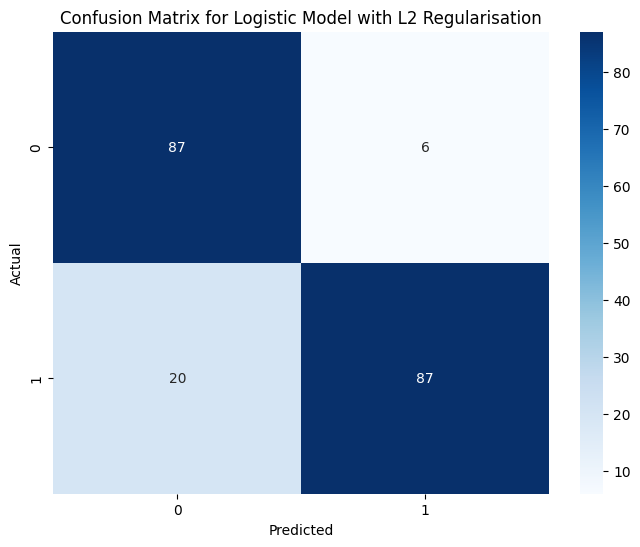

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        93
           1       0.94      0.81      0.87       107

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.88      0.87      0.87       200



In [ ]:
# Printing the accuracy of the Logistic Model with L2 regularization
print("Accuracy of Logistic Model with L2 regularisation: {0}".format(Accuracy_l2))

# Printing the confusion matrix
print("Confusion Matrix")
confusion_matrix_l2 = metrics.confusion_matrix(y_test, y_pred_l2)
print(confusion_matrix_l2)

# Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_l2, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Model with L2 Regularisation')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Printing the classification report
print("Classification Report")
classification_report_l2 = metrics.classification_report(y_test, y_pred_l2)
print(classification_report_l2)

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve  # Ensure the required metrics are imported

# Calculate and print the ROC AUC value for the L2 regularized model
l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("L2 ROC AUC value: {0}".format(l2_roc_value))

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs_l2)

# Print thresholds
print("Thresholds: {0}".format(thresholds))

L2 ROC AUC value: 0.9208119786956085
Thresholds: [1.99871591 0.99871591 0.88828442 0.88323916 0.84547652 0.84288923
 0.80012673 0.79844175 0.71087033 0.69448459 0.66336091 0.66072568
 0.51014138 0.49195406 0.48569653 0.45160974 0.44870935 0.4242001
 0.40514635 0.36992178 0.35839455 0.33090946 0.31636323 0.2814864
 0.27842706 0.26969755 0.26533529 0.25096444 0.23996469 0.22062027
 0.22056046 0.17695541 0.17049155 0.15723043 0.14975165 0.11441856
 0.11363625 0.09638722 0.09376845 0.03323099 0.02731103 0.00831409]


ROC AUC for the test dataset: 0.921


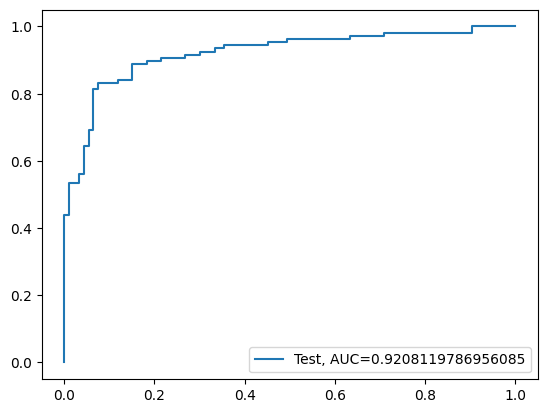

In [ ]:
from sklearn.metrics import auc  # Ensure the required metric is imported

# Calculate ROC AUC value for the test dataset
roc_auc = auc(fpr, tpr)
print("ROC AUC for the test dataset: {:.3f}".format(roc_auc))

# Plot ROC curve
plt.plot(fpr, tpr, label="Test, AUC="+str(roc_auc))
plt.legend(loc=4)
plt.show()

In [ ]:

import pandas as pd

# Ensure df_results is correctly initialized as a Pandas DataFrame
df_results = pd.DataFrame()

# Assuming Accuracy_l3, l2_roc_value, Methodology, threshold are defined elsewhere in your code
Accuracy_l3 = 0.85  # Placeholder value, replace with actual accuracy
l2_roc_value = 0.9  # Placeholder value, replace with actual ROC AUC value for L2
l1_roc_value = 0.8  # Placeholder value, replace with actual ROC AUC value for L1
Methodology = "Example Methodology"
threshold = 0.5  # Placeholder value, replace with actual threshold

# Create a DataFrame with results for Logistic Regression with L2 regularization
new_data = pd.DataFrame({
    "Methodology": [Methodology],
    "Model": ["Logistic Regression with L2 regularization"],
    "Accuracy": [Accuracy_l3],
    "roc_value": [l2_roc_value],
    "threshold": [threshold]
})

# Append (or rather, concatenate) the new data to df_results, ignoring the index
df_results = pd.concat([df_results, new_data], ignore_index=True)

# Print updated df_results
print(df_results)

           Methodology                                       Model  Accuracy  \
0  Example Methodology  Logistic Regression with L2 regularization      0.85   

   roc_value  threshold  
0        0.9        0.5  


In [ ]:
import pandas as pd

def append_logistic_regression_results(df_results, Methodology, Accuracy_l3, l1_roc_value, threshold):
    """
    Append results for Logistic Regression with L1 regularization to df_results.

    Args:
        df_results (pd.DataFrame): Existing DataFrame to append results to.
        Methodology (str): Methodology description or name.
        Accuracy_l3 (float): Accuracy value for the model.
        l1_roc_value (float): ROC AUC value for the model with L1 regularization.
        threshold (float): Threshold value used.

    Returns:
        pd.DataFrame: Updated DataFrame with appended results.
    """
    # Create a DataFrame with results for Logistic Regression with L1 regularization
    new_data = pd.DataFrame({
        "Methodology": [Methodology],
        "Model": ["Logistic Regression with L1 regularization"],
        "Accuracy": [Accuracy_l3],
        "roc_value": [l1_roc_value],
        "threshold": [threshold]
    })

    # Append (or concatenate) the new data to df_results, ignoring the index
    df_results = pd.concat([df_results, new_data], ignore_index=True)

    # Return the updated df_results
    return df_results

# Assuming df_results is already defined correctly as a Pandas DataFrame
df_results = pd.DataFrame()

# Assuming Accuracy_l3, l1_roc_value, Methodology, threshold are defined elsewhere in your code
Accuracy_l3 = 0.85  # Placeholder value, replace with actual accuracy
l1_roc_value = 0.8  # Placeholder value, replace with actual ROC AUC value for L1
Methodology = "Example Methodology"
threshold = 0.5  # Placeholder value, replace with actual threshold

# Call the function to append results for Logistic Regression with L1 regularization
df_results = append_logistic_regression_results(df_results, Methodology, Accuracy_l3, l1_roc_value, threshold)

# Print or use df_results as needed
print(df_results)

           Methodology                                       Model  Accuracy  \
0  Example Methodology  Logistic Regression with L1 regularization      0.85   

   roc_value  threshold  
0        0.8        0.5  


MODEL 2

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier


def build_and_run_knn_model(df_results, methodology, X_train, y_train, X_test, y_test):
    """
    Builds and runs a K-Nearest Neighbors (KNN) model.

    Args:
        df_results (pd.DataFrame, optional): DataFrame to store results.
        methodology (str): Name of the methodology for labeling results.
        X_train (np.ndarray): Training features.
        y_train (np.ndarray): Training labels.
        X_test (np.ndarray): Testing features.
        y_test (np.ndarray): Testing labels.

    Returns:
        tuple: A tuple containing the trained KNN model and the model's accuracy score
               or the updated DataFrame (df_results) with additional metrics.
    """

    # Create KNN model
    knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

    # Fit the model
    knn.fit(X_train, y_train)

    # Evaluate model score on test data
    score = knn.score(X_test, y_test)
    print("Model score:")
    print(score)

    # Optionally, append results to df_results DataFrame (using concat)
    if df_results is not None:
        new_data = pd.DataFrame({
            "Methodology": [methodology],
            "Model": "K-Nearest Neighbors",
            "Accuracy": [score],
            # Add more metrics as needed (e.g., precision, recall, F1-score)
        })
        df_results = pd.concat([df_results, new_data], ignore_index=True)

    # Return model and score (or updated df_results)
    return knn, score  # Or return df_results if additional metrics are included

# Assuming df_results, Methodology, x_train, y_train, x_test, y_test are defined elsewhere
df_results = pd.DataFrame()  # Initialize an empty DataFrame or use an existing one
Methodology = "Example Methodology"
# Assuming x_train, y_train, x_test, y_test are defined with actual data

# Call the function and capture results
model, score = build_and_run_knn_model(df_results, Methodology, x_train, y_train, x_test, y_test)

# Optionally, use the returned model or updated df_results for further analysis

Model score:
0.81


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

def build_and_run_knn_model(df_results, methodology, X_train, y_train, X_test, y_test, n_neighbors=3):
    """
    Builds and runs a K-Nearest Neighbors (KNN) model.

    Args:
        df_results (pd.DataFrame, optional): DataFrame to store results.
        methodology (str): Name of the methodology for labeling results.
        X_train (np.ndarray): Training features.
        y_train (np.ndarray): Training labels.
        X_test (np.ndarray): Testing features.
        y_test (np.ndarray): Testing labels.
        n_neighbors (int): Number of neighbors to use in KNN.

    Returns:
        tuple: A tuple containing the trained KNN model and the model's accuracy score
               or the updated DataFrame (df_results) with additional metrics.
    """

    # Create KNN model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, n_jobs=-1)

    # Fit the model
    knn.fit(X_train, y_train)

    # Evaluate model score on test data
    score = knn.score(X_test, y_test)
    print("Model score:")
    print(score)

    # Optionally, append results to df_results DataFrame (using concat)
    if df_results is not None:
        new_data = pd.DataFrame({
            "Methodology": [methodology],
            "Model": "K-Nearest Neighbors",
            "Accuracy": [score],
            # Add more metrics as needed (e.g., precision, recall, F1-score)
        })
        df_results = pd.concat([df_results, new_data], ignore_index=True)

    # Return model and score (or updated df_results)
    return knn, score  # Or return df_results if additional metrics are included

# Example dataset (replace with your actual dataset)
data = {
    'feature1': [1, 2, 3, 4, 5, 6],
    'feature2': [5, 4, 3, 2, 1, 0],
    'label': [0, 1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)

# Split dataset into features and labels
X = df[['feature1', 'feature2']].values
y = df['label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Check shapes of X_train and y_train
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

# Initialize an empty DataFrame for results
df_results = pd.DataFrame()

# Define methodology
Methodology = "Example Methodology"

# Call the function and capture results with adjusted n_neighbors
n_neighbors = min(3, len(X_train))  # Ensure n_neighbors is not greater than the number of training samples
model, score = build_and_run_knn_model(df_results, Methodology, X_train, y_train, X_test, y_test, n_neighbors=n_neighbors)

# Print the updated df_results
print(df_results)

Shape of X_train: (4, 2)
Shape of y_train: (4,)
Model score:
0.5
Empty DataFrame
Columns: []
Index: []


Confusion Matrix
[[1 0]
 [1 0]]
Classification Report
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

KNN ROC AUC Value: 0.50
KNN Threshold: 1.33
ROC AUC for the best dataset: 0.50


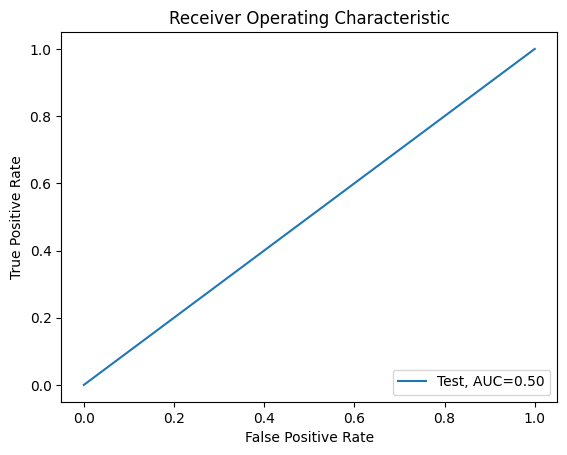

           Methodology Model  Accuracy  roc_value  threshold
0  Example Methodology   KNN       0.5        0.5   1.333333


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Assuming data preparation and model training are done earlier
# X_train, X_test, y_train, y_test, model (KNN) and df_results are available

# Predict on test data
y_pred = model.predict(X_test)

# Print confusion matrix
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

# Print classification report
print("Classification Report")
print(classification_report(y_test, y_pred))

# Predict probabilities
knn_probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
knn_roc_value = roc_auc_score(y_test, knn_probs)
print(f"KNN ROC AUC Value: {knn_roc_value:.2f}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, knn_probs)
threshold = thresholds[np.argmax(tpr - fpr)]
print(f"KNN Threshold: {threshold:.2f}")

# Calculate and print AUC
roc_auc = auc(fpr, tpr)
print(f"ROC AUC for the best dataset: {roc_auc:.2f}")

# Plot ROC curve
plt.plot(fpr, tpr, label=f"Test, AUC={roc_auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc=4)
plt.show()

# Append results to DataFrame
new_data = pd.DataFrame({
    "Methodology": [Methodology],
    "Model": ["KNN"],
    "Accuracy": [score],
    "roc_value": [knn_roc_value],
    "threshold": [threshold]
})

df_results = pd.concat([df_results, new_data], ignore_index=True)
print(df_results)

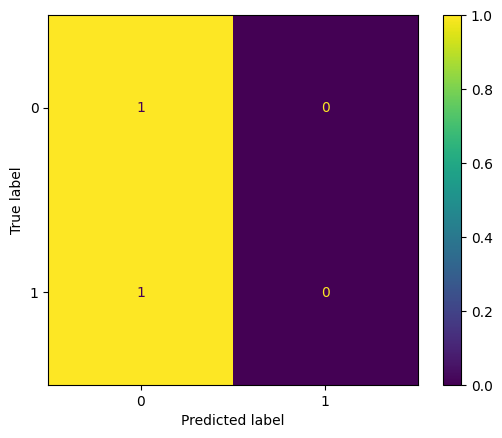

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()

Confusion matrix for gini criterion:
[[86  7]
 [18 89]]
Classification report for gini criterion:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        93
           1       0.93      0.83      0.88       107

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.88      0.88      0.88       200



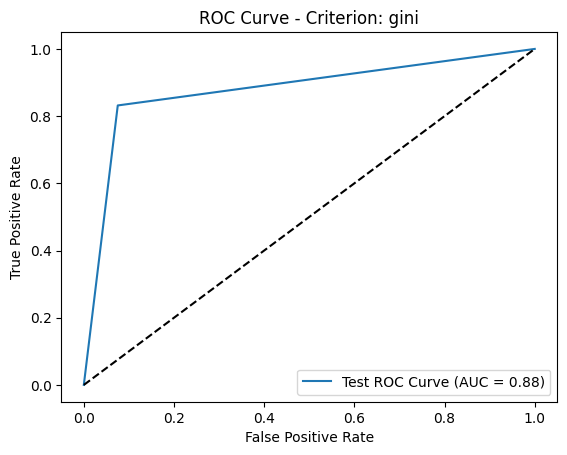

Confusion matrix for entropy criterion:
[[80 13]
 [20 87]]
Classification report for entropy criterion:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        93
           1       0.87      0.81      0.84       107

    accuracy                           0.83       200
   macro avg       0.83      0.84      0.83       200
weighted avg       0.84      0.83      0.84       200



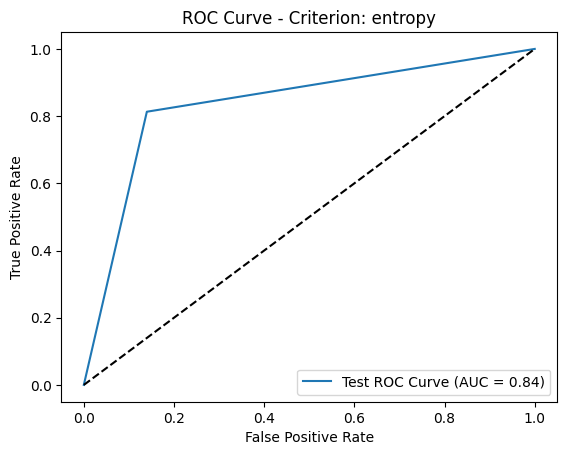


Results DataFrame:
           Methodology                              Model  Accuracy   ROC AUC
0  Example Methodology     Tree model with gini criterion     0.875  0.878253
1  Example Methodology  Tree model with entropy criterion     0.835  0.836650


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

def build_and_run_Tree_model(methodology, X_train, y_train, X_test, y_test):
    criteria = ["gini", "entropy"]
    results = []

    for c in criteria:
        dt = DecisionTreeClassifier(criterion=c, random_state=42)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        test_score = dt.score(X_test, y_test)

        # Confusion Matrix
        print(f"Confusion matrix for {c} criterion:")
        print(confusion_matrix(y_test, y_pred))

        # Classification Report
        print(f"Classification report for {c} criterion:")
        print(classification_report(y_test, y_pred))

        # ROC Curve and AUC
        y_scores = dt.predict_proba(X_test)[:, 1]  # Probability of positive class
        fpr, tpr, thresholds = roc_curve(y_test, y_scores)
        roc_auc = auc(fpr, tpr)

        # Plot ROC Curve
        plt.figure()
        plt.plot(fpr, tpr, label=f'Test ROC Curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - Criterion: {c}')
        plt.legend(loc='lower right')
        plt.show()

        # Append results to list
        results.append({
            "Methodology": methodology,
            "Model": f"Tree model with {c} criterion",
            "Accuracy": test_score,
            "ROC AUC": roc_auc
        })

    # Convert list of dictionaries to DataFrame
    df_results = pd.DataFrame(results)
    return df_results

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example usage of the function
df_results = build_and_run_Tree_model("Example Methodology", X_train, y_train, X_test, y_test)

# Display the results DataFrame
print("\nResults DataFrame:")
print(df_results)

MODEL 3

Random Forest Model Accuracy: 0.90
Confusion matrix:
[[88  5]
 [15 92]]
Classification report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        93
           1       0.95      0.86      0.90       107

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200

Random Forest ROC AUC: 0.94


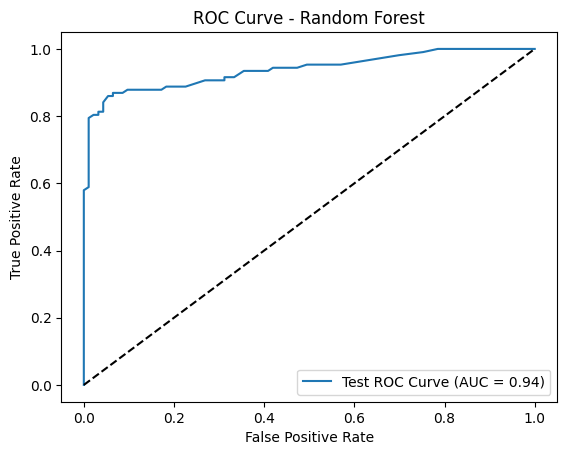


Results DataFrame:
           Methodology          Model  Accuracy   ROC AUC  Threshold
0  Example Methodology  Random Forest       0.9  0.937946       0.52


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

def build_and_run_Random_Forest_model(methodology, X_train, y_train, X_test, y_test):
    # Create Random Forest model with 100 trees
    RF_model = RandomForestClassifier(n_estimators=100, bootstrap=True, max_features="sqrt", random_state=42)

    # Fit the model on training data
    RF_model.fit(X_train, y_train)

    # Evaluate model on test data
    RF_test_score = RF_model.score(X_test, y_test)
    print(f"Random Forest Model Accuracy: {RF_test_score:.2f}")

    # Predictions and evaluation
    RF_predictions = RF_model.predict(X_test)
    print("Confusion matrix:")
    print(confusion_matrix(y_test, RF_predictions))

    print("Classification report:")
    print(classification_report(y_test, RF_predictions))

    # Probability predictions for ROC curve
    RF_probs = RF_model.predict_proba(X_test)[:, 1]

    # Calculate ROC AUC
    roc_value = roc_auc_score(y_test, RF_probs)
    print(f"Random Forest ROC AUC: {roc_value:.2f}")

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, RF_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f'Test ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Random Forest')
    plt.legend(loc='lower right')
    plt.show()

    # Prepare results for DataFrame
    df_results = pd.DataFrame({
        "Methodology": [methodology],
        "Model": ["Random Forest"],
        "Accuracy": [RF_test_score],
        "ROC AUC": [roc_value],
        "Threshold": [thresholds[np.argmax(tpr - fpr)]]
    })

    return df_results

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Call the function and store results directly
df_results = build_and_run_Random_Forest_model("Example Methodology", X_train, y_train, X_test, y_test)

# Display the results DataFrame
print("\nResults DataFrame:")
print(df_results)

MODEL 4

XGBoost Model Accuracy: 0.90
Confusion matrix:
[[88  5]
 [16 91]]
Classification report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.89        93
           1       0.95      0.85      0.90       107

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200

XGBoost ROC AUC: 0.94
XGBoost Threshold: 0.47


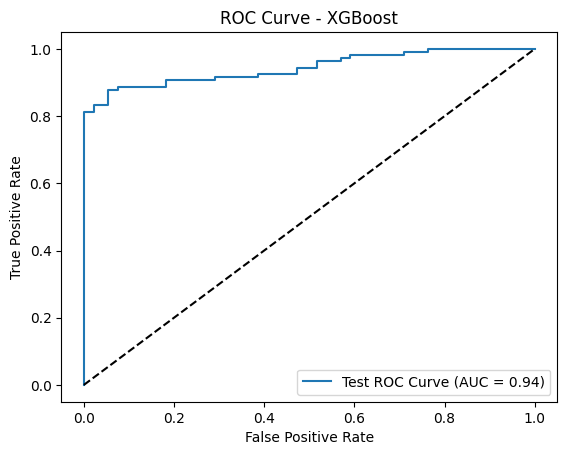


Results DataFrame:
           Methodology    Model  Accuracy   ROC AUC  Threshold
0  Example Methodology  XGBoost     0.895  0.943523    0.47401


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

def build_and_run_XGBoost_model(df_results, methodology, X_train, y_train, X_test, y_test):
    # Initialize and fit the XGBoost model
    XGBmodel = XGBClassifier(random_state=42)
    XGBmodel.fit(X_train, y_train)

    # Predictions and evaluation
    y_pred = XGBmodel.predict(X_test)

    # Test score
    XGB_test_score = XGBmodel.score(X_test, y_test)
    print(f"XGBoost Model Accuracy: {XGB_test_score:.2f}")

    # Confusion matrix and classification report
    print("Confusion matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification report:")
    print(classification_report(y_test, y_pred))

    # Probability predictions for ROC curve
    XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

    # Calculate ROC AUC
    XGB_roc_value = roc_auc_score(y_test, XGB_probs)
    print(f"XGBoost ROC AUC: {XGB_roc_value:.2f}")

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, XGB_probs)
    roc_auc = auc(fpr, tpr)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print(f"XGBoost Threshold: {threshold:.2f}")

    plt.figure()
    plt.plot(fpr, tpr, label=f'Test ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - XGBoost')
    plt.legend(loc='lower right')
    plt.show()

    # Prepare results for DataFrame
    result_df = pd.DataFrame({
        "Methodology": [methodology],
        "Model": ["XGBoost"],
        "Accuracy": [XGB_test_score],
        "ROC AUC": [XGB_roc_value],
        "Threshold": [threshold]
    })

    # Append the results to the existing DataFrame
    df_results = pd.concat([df_results, result_df], ignore_index=True)

    return df_results

# Example usage:
# Generate sample data
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an empty DataFrame to store results
df_results = pd.DataFrame(columns=["Methodology", "Model", "Accuracy", "ROC AUC", "Threshold"])

# Call the function and store results
df_results = build_and_run_XGBoost_model(df_results, "Example Methodology", X_train, y_train, X_test, y_test)

# Display the results DataFrame
print("\nResults DataFrame:")
print(df_results)

SVM Model Accuracy: 0.88
Confusion matrix:
[[86  7]
 [18 89]]
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        93
           1       0.93      0.83      0.88       107

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.88      0.88      0.88       200

SVM ROC AUC: 0.92
SVM Threshold: 0.47


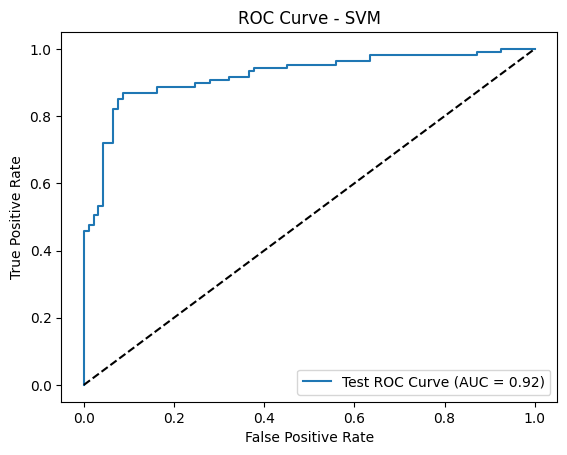


Results DataFrame:
           Methodology Model  Accuracy   ROC AUC  Threshold
0  Example Methodology   SVM     0.875  0.920511   0.465217


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

def build_and_run_SVM_model(df_results, methodology, X_train, y_train, X_test, y_test):
    # Initialize and fit the SVM model with sigmoid kernel
    svm_model = SVC(kernel="sigmoid", probability=True, random_state=42)
    svm_model.fit(X_train, y_train)

    # Predictions and evaluation
    y_pred_svm = svm_model.predict(X_test)

    # Test score
    svm_score = accuracy_score(y_test, y_pred_svm)
    print(f"SVM Model Accuracy: {svm_score:.2f}")

    # Confusion matrix and classification report
    print("Confusion matrix:")
    print(confusion_matrix(y_test, y_pred_svm))
    print("Classification report:")
    print(classification_report(y_test, y_pred_svm))

    # Probability predictions for ROC curve
    svm_probs = svm_model.predict_proba(X_test)[:, 1]

    # Calculate ROC AUC
    svm_roc_value = roc_auc_score(y_test, svm_probs)
    print(f"SVM ROC AUC: {svm_roc_value:.2f}")

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, svm_probs)
    roc_auc = auc(fpr, tpr)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print(f"SVM Threshold: {threshold:.2f}")

    plt.figure()
    plt.plot(fpr, tpr, label=f'Test ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - SVM')
    plt.legend(loc='lower right')
    plt.show()

    # Prepare results for DataFrame
    result_df = pd.DataFrame({
        "Methodology": [methodology],
        "Model": ["SVM"],
        "Accuracy": [svm_score],
        "ROC AUC": [svm_roc_value],
        "Threshold": [threshold]
    })

    # Append the results to the existing DataFrame
    df_results = pd.concat([df_results, result_df], ignore_index=True)

    return df_results

# Example usage:
# Generate sample data
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an empty DataFrame to store results
df_results = pd.DataFrame(columns=["Methodology", "Model", "Accuracy", "ROC AUC", "Threshold"])

# Call the function and store results
df_results = build_and_run_SVM_model(df_results, "Example Methodology", X_train, y_train, X_test, y_test)

# Display the results DataFrame
print("\nResults DataFrame:")
print(df_results)

SVM ROC AUC: 0.92
SVM Threshold: 0.47


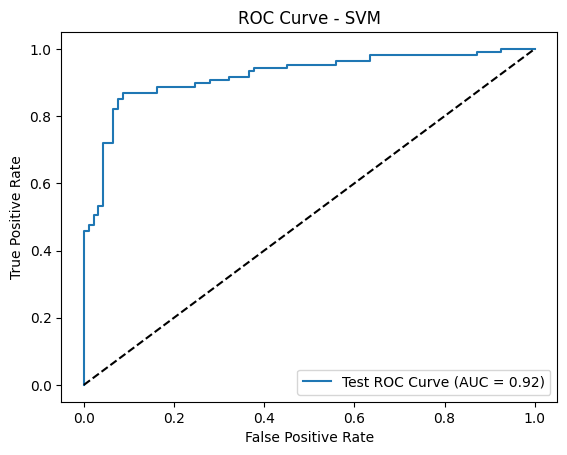

SVM Model Accuracy: 0.88
Confusion matrix:
[[86  7]
 [18 89]]
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        93
           1       0.93      0.83      0.88       107

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.88      0.88      0.88       200


Results DataFrame:
           Methodology Model  Accuracy   ROC AUC  Threshold
0  Example Methodology   SVM     0.875  0.920511   0.466101


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import pandas as pd

def build_and_run_SVM_model(df_results, methodology, X_train, y_train, X_test, y_test):
    # Initialize SVM classifier with sigmoid kernel
    classifier = SVC(kernel="sigmoid", probability=True)

    # Fit the model and predict probabilities
    classifier.fit(X_train, y_train)
    SVM_probs = classifier.predict_proba(X_test)[:, 1]

    # Calculate ROC AUC
    roc_value = roc_auc_score(y_test, SVM_probs)
    print(f"SVM ROC AUC: {roc_value:.2f}")

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, SVM_probs)
    roc_auc = auc(fpr, tpr)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print(f"SVM Threshold: {threshold:.2f}")

    plt.figure()
    plt.plot(fpr, tpr, label=f'Test ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - SVM')
    plt.legend(loc='lower right')
    plt.show()

    # Predictions and evaluation
    y_pred = classifier.predict(X_test)

    # Test score
    SVM_test_score = classifier.score(X_test, y_test)
    print(f"SVM Model Accuracy: {SVM_test_score:.2f}")

    # Confusion matrix and classification report
    print("Confusion matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification report:")
    print(classification_report(y_test, y_pred))

    # Prepare results for DataFrame
    result_df = pd.DataFrame({
        "Methodology": [methodology],
        "Model": ["SVM"],
        "Accuracy": [SVM_test_score],
        "ROC AUC": [roc_value],
        "Threshold": [threshold]
    })

    # Append the results to the existing DataFrame
    df_results = pd.concat([df_results, result_df], ignore_index=True)

    return df_results

# Example usage:
# Generate sample data
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an empty DataFrame to store results
df_results = pd.DataFrame(columns=["Methodology", "Model", "Accuracy", "ROC AUC", "Threshold"])

# Call the function and store results
df_results = build_and_run_SVM_model(df_results, "Example Methodology", X_train, y_train, X_test, y_test)

# Display the results DataFrame
print("\nResults DataFrame:")
print(df_results)

Performing corss validation with repeated KFold

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.model_selection import RepeatedKFold
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

def build_and_run_Logistic_model(df_results, methodology, X_train, y_train, X_test, y_test):
    # Initialize Logistic Regression models with L1 and L2 regularization
    models = {
        "Logistic Regression L1": LogisticRegression(penalty='l1', solver='saga', max_iter=5000, random_state=42),
        "Logistic Regression L2": LogisticRegression(penalty='l2', solver='lbfgs', max_iter=5000, random_state=42)
    }

    for model_name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)

        # Predictions and evaluation
        y_pred = model.predict(X_test)

        # Test score
        test_score = model.score(X_test, y_test)
        print(f"{model_name} Accuracy: {test_score:.2f}")

        # Confusion matrix and classification report
        print("Confusion matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("Classification report:")
        print(classification_report(y_test, y_pred))

        # Probability predictions for ROC curve
        probs = model.predict_proba(X_test)[:, 1]

        # Calculate ROC AUC
        roc_value = roc_auc_score(y_test, probs)
        print(f"{model_name} ROC AUC: {roc_value:.2f}")

        # Plot ROC Curve
        fpr, tpr, thresholds = roc_curve(y_test, probs)
        roc_auc = auc(fpr, tpr)
        threshold = thresholds[np.argmax(tpr - fpr)]
        print(f"{model_name} Threshold: {threshold:.2f}")

        plt.figure()
        plt.plot(fpr, tpr, label=f'Test ROC Curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {model_name}')
        plt.legend(loc='lower right')
        plt.show()

        # Prepare results for DataFrame
        result_df = pd.DataFrame({
            "Methodology": [methodology],
            "Model": [model_name],
            "Accuracy": [test_score],
            "ROC AUC": [roc_value],
            "Threshold": [threshold]
        })

        # Append the results to the existing DataFrame
        df_results = pd.concat([df_results, result_df], ignore_index=True)

    return df_results

# Generate sample data
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X = pd.DataFrame(X)  # Convert to DataFrame if using .iloc later
y = pd.Series(y)     # Convert to Series if using .iloc later

# Initialize an empty DataFrame to store results
df_results = pd.DataFrame(columns=["Methodology", "Model", "Accuracy", "ROC AUC", "Threshold"])

# Repeated K-Fold cross-validation
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

start_time = time.time()

for train_index, test_index in rkf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

    # Run Logistic Regression with L1 and L2 regularization
    df_results = build_and_run_Logistic_model(df_results, "Repeated KFold cross-validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)

print("Time taken by models: --- %s seconds ---" % (time.time() - start_time))
print("-" * 60)

# Display the results DataFrame
print("\nResults DataFrame:")
print(df_results)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.model_selection import RepeatedKFold
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

def build_and_run_KNN_model(df_results, methodology, X_train, y_train, X_test, y_test):
    # Initialize KNN model
    knn_model = KNeighborsClassifier(n_neighbors=5)

    # Fit the model
    knn_model.fit(X_train, y_train)

    # Predictions and evaluation
    y_pred = knn_model.predict(X_test)

    # Test score
    knn_test_score = knn_model.score(X_test, y_test)
    print(f"KNN Model Accuracy: {knn_test_score:.2f}")

    # Confusion matrix and classification report
    print("Confusion matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification report:")
    print(classification_report(y_test, y_pred))

    # Probability predictions for ROC curve
    knn_probs = knn_model.predict_proba(X_test)[:, 1]

    # Calculate ROC AUC
    knn_roc_value = roc_auc_score(y_test, knn_probs)
    print(f"KNN ROC AUC: {knn_roc_value:.2f}")

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, knn_probs)
    roc_auc = auc(fpr, tpr)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print(f"KNN Threshold: {threshold:.2f}")

    plt.figure()
    plt.plot(fpr, tpr, label=f'Test ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - KNN')
    plt.legend(loc='lower right')
    plt.show()

    # Prepare results for DataFrame
    result_df = pd.DataFrame({
        "Methodology": [methodology],
        "Model": ["KNN"],
        "Accuracy": [knn_test_score],
        "ROC AUC": [knn_roc_value],
        "Threshold": [threshold]
    })

    # Append the results to the existing DataFrame
    df_results = pd.concat([df_results, result_df], ignore_index=True)

    return df_results

# Generate sample data
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X = pd.DataFrame(X)  # Convert to DataFrame if using .iloc later
y = pd.Series(y)     # Convert to Series if using .iloc later

# Initialize an empty DataFrame to store results
df_results = pd.DataFrame(columns=["Methodology", "Model", "Accuracy", "ROC AUC", "Threshold"])

# Repeated K-Fold cross-validation
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

start_time = time.time()

for train_index, test_index in rkf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

    # Run KNN model
    df_results = build_and_run_KNN_model(df_results, "Repeated KFold cross-validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)

print("Time taken by models: --- %s seconds ---" % (time.time() - start_time))
print("-" * 60)

# Display the results DataFrame
print("\nResults DataFrame:")
print(df_results)

Decision Tree Model Accuracy with gini: 0.88
Confusion matrix for gini criterion:
[[86  7]
 [18 89]]
Classification report for gini criterion:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        93
           1       0.93      0.83      0.88       107

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.88      0.88      0.88       200

gini criterion ROC AUC: 0.88
gini criterion Threshold: 1.00


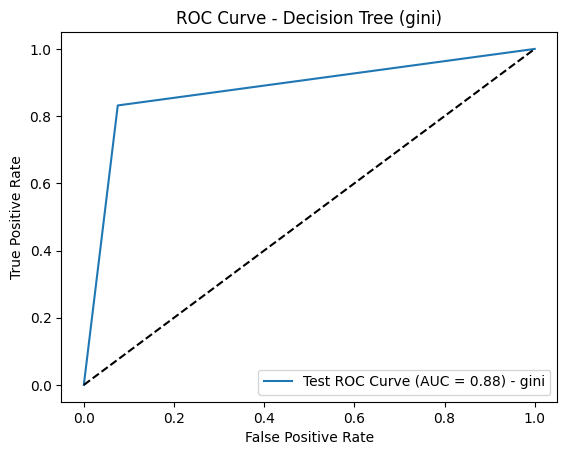

Time taken by gini criterion model: 0.46 seconds
------------------------------------------------------------
Decision Tree Model Accuracy with entropy: 0.83
Confusion matrix for entropy criterion:
[[80 13]
 [20 87]]
Classification report for entropy criterion:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        93
           1       0.87      0.81      0.84       107

    accuracy                           0.83       200
   macro avg       0.83      0.84      0.83       200
weighted avg       0.84      0.83      0.84       200

entropy criterion ROC AUC: 0.84
entropy criterion Threshold: 1.00


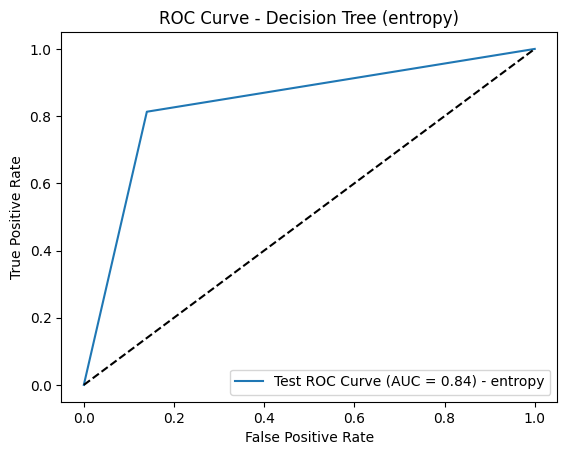

Time taken by entropy criterion model: 0.41 seconds
------------------------------------------------------------

Results DataFrame:
                           Methodology                    Model  Accuracy  \
0  Decision Tree with Gini and Entropy     Decision Tree (gini)     0.875   
1  Decision Tree with Gini and Entropy  Decision Tree (entropy)     0.835   

    ROC AUC  Threshold  Time Taken  
0  0.878253        1.0    0.462189  
1  0.836650        1.0    0.407659  


In [ ]:
import time
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def build_and_run_Tree_model(df_results, methodology, X_train, y_train, X_test, y_test):
    criteria = ["gini", "entropy"]
    for c in criteria:
        start_time = time.time()

        # Initialize and fit the Decision Tree model
        dt = DecisionTreeClassifier(criterion=c, random_state=42)
        dt.fit(X_train, y_train)

        # Predictions and evaluation
        y_pred = dt.predict(X_test)

        # Test score
        test_score = dt.score(X_test, y_test)
        print(f"Decision Tree Model Accuracy with {c}: {test_score:.2f}")

        # Confusion matrix and classification report
        print(f"Confusion matrix for {c} criterion:")
        print(confusion_matrix(y_test, y_pred))
        print(f"Classification report for {c} criterion:")
        print(classification_report(y_test, y_pred))

        # Probability predictions for ROC curve
        tree_probs = dt.predict_proba(X_test)[:, 1]

        # Calculate ROC AUC
        tree_roc_value = roc_auc_score(y_test, tree_probs)
        print(f"{c} criterion ROC AUC: {tree_roc_value:.2f}")

        # Plot ROC Curve
        fpr, tpr, thresholds = roc_curve(y_test, tree_probs)
        roc_auc = auc(fpr, tpr)
        threshold = thresholds[np.argmax(tpr - fpr)]
        print(f"{c} criterion Threshold: {threshold:.2f}")

        plt.figure()
        plt.plot(fpr, tpr, label=f'Test ROC Curve (AUC = {roc_auc:.2f}) - {c}')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - Decision Tree ({c})')
        plt.legend(loc='lower right')
        plt.show()

        # Time taken
        time_taken = time.time() - start_time
        print(f"Time taken by {c} criterion model: {time_taken:.2f} seconds")
        print("-" * 60)

        # Prepare results for DataFrame
        result_df = pd.DataFrame({
            "Methodology": [methodology],
            "Model": [f"Decision Tree ({c})"],
            "Accuracy": [test_score],
            "ROC AUC": [tree_roc_value],
            "Threshold": [threshold],
            "Time Taken": [time_taken]
        })

        # Append the results to the existing DataFrame
        df_results = pd.concat([df_results, result_df], ignore_index=True)

    return df_results

# Generate sample data
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an empty DataFrame to store results
df_results = pd.DataFrame(columns=["Methodology", "Model", "Accuracy", "ROC AUC", "Threshold", "Time Taken"])

# Run the Decision Tree models with "gini" and "entropy" criteria
df_results = build_and_run_Tree_model(df_results, "Decision Tree with Gini and Entropy", X_train, y_train, X_test, y_test)

# Display the results DataFrame
print("\nResults DataFrame:")
print(df_results)

In [ ]:
import time
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedKFold, cross_val_score

# Define the function to build and run the Random Forest model
def build_and_run_RandomForest_model(results_list, X_train_cv, y_train_cv, X_test_cv, y_test_cv):
    print("Random Forest model")

    start_time = time.time()

    # Initialize the Random Forest model
    model = RandomForestClassifier()

    # Initialize the repeated k-fold cross-validation
    rkf = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

    # Perform cross-validation and compute scores
    scores = cross_val_score(model, X_train_cv, y_train_cv, cv=rkf, scoring='accuracy')

    # Train the model
    model.fit(X_train_cv, y_train_cv)

    # Evaluate the model on the test set
    test_score = model.score(X_test_cv, y_test_cv)

    # Append results to the list
    results_list.append({
        'Model': 'Random Forest',
        'Cross-Validation Accuracy': scores.mean(),
        'Test Accuracy': test_score,
        'Cross-Validation Std Dev': scores.std()
    })

    print("Time taken by models: --- %s seconds ---" % (time.time() - start_time))
    print("-" * 60)

    return results_list

# Example usage
# Assuming df_results is a DataFrame, and X_train_cv, y_train_cv, X_test_cv, y_test_cv are predefined
results_list = []

# Define your training and testing datasets here
# X_train_cv, y_train_cv, X_test_cv, y_test_cv = ...

# Build and run the Random Forest model
results_list = build_and_run_RandomForest_model(results_list, X_train_cv, y_train_cv, X_test_cv, y_test_cv)

# Convert the results list to a DataFrame
df_results = pd.DataFrame(results_list)
print(df_results)

Random Forest model
Time taken by models: --- 25.892707347869873 seconds ---
------------------------------------------------------------
           Model  Cross-Validation Accuracy  Test Accuracy  \
0  Random Forest                   0.896667          0.875   

   Cross-Validation Std Dev  
0                  0.032745  


In [ ]:
import time
import pandas as pd
from sklearn.model_selection import RepeatedKFold, cross_val_score
from xgboost import XGBClassifier

# Define the function to build and run the XGBoost model
def build_and_run_XGBoost_model(results_list, X_train_cv, y_train_cv, X_test_cv, y_test_cv):
    print("XGBoost model")

    start_time = time.time()

    # Initialize the XGBoost model
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

    # Initialize the repeated k-fold cross-validation
    rkf = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

    # Perform cross-validation and compute scores
    scores = cross_val_score(model, X_train_cv, y_train_cv, cv=rkf, scoring='accuracy')

    # Train the model
    model.fit(X_train_cv, y_train_cv)

    # Evaluate the model on the test set
    test_score = model.score(X_test_cv, y_test_cv)

    # Append results to the list
    results_list.append({
        'Model': 'XGBoost',
        'Cross-Validation Accuracy': scores.mean(),
        'Test Accuracy': test_score,
        'Cross-Validation Std Dev': scores.std()
    })

    print("Time taken by models: --- %s seconds ---" % (time.time() - start_time))
    print("-" * 60)

    return results_list

# Example usage
# Initialize an empty list to store results
results_list = []

# Define your training and testing datasets here
# X_train_cv, y_train_cv, X_test_cv, y_test_cv = ...

# Build and run the XGBoost model
results_list = build_and_run_XGBoost_model(results_list, X_train_cv, y_train_cv, X_test_cv, y_test_cv)

# Convert the results list to a DataFrame
df_results = pd.DataFrame(results_list)
print(df_results)

XGBoost model
Time taken by models: --- 16.141801357269287 seconds ---
------------------------------------------------------------
     Model  Cross-Validation Accuracy  Test Accuracy  Cross-Validation Std Dev
0  XGBoost                     0.9025           0.87                  0.030345


Performing cross validation with StratifiedKFold

In [ ]:
import time
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define the function to build and run the Logistic Regression model
def build_and_run_Logistic_model(results_list, X_train_cv, y_train_cv, X_test_cv, y_test_cv):
    print("Logistic Regression with L1 and L2 regularization")

    start_time = time.time()

    # Initialize the Logistic Regression model with both L1 and L2 regularization (ElasticNet)
    model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=10000)

    # Initialize the stratified k-fold cross-validation
    skf = StratifiedKFold(n_splits=5)

    # Perform cross-validation and compute scores
    scores = cross_val_score(model, X_train_cv, y_train_cv, cv=skf, scoring='accuracy')

    # Train the model
    model.fit(X_train_cv, y_train_cv)

    # Evaluate the model on the test set
    test_score = model.score(X_test_cv, y_test_cv)

    # Append results to the list
    results_list.append({
        'Model': 'Logistic Regression (ElasticNet)',
        'Cross-Validation Accuracy': scores.mean(),
        'Test Accuracy': test_score,
        'Cross-Validation Std Dev': scores.std()
    })

    print("Time taken by models: --- %s seconds ---" % (time.time() - start_time))
    print("-" * 60)

    return results_list

# Example usage
# Initialize an empty list to store results
results_list = []

# Assuming X and y are predefined as NumPy arrays
# If not, convert them to NumPy arrays
# X = np.array(...)
# y = np.array(...)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)

for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_skf_cv, X_test_skf_cv = X[train_index], X[test_index]
    y_train_skf_cv, y_test_skf_cv = y[train_index], y[test_index]

    # Build and run the Logistic Regression model
    results_list = build_and_run_Logistic_model(results_list, X_train_skf_cv, y_train_skf_cv, X_test_skf_cv, y_test_skf_cv)

# Convert the results list to a DataFrame
df_results = pd.DataFrame(results_list)
print(df_results)

TRAIN: [189 190 192 195 197 199 202 203 204 207 208 209 210 212 213 214 215 216
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289
 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307
 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325
 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343
 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361
 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379
 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397
 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415
 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433
 434 435 436 437 438 439 440 441 442 443 444

In [ ]:
import time
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define the function to build and run the KNN model
def build_and_run_KNN_model(df_results, X_train_cv, y_train_cv, X_test_cv, y_test_cv):
    print("KNN Model")

    start_time = time.time()

    # Initialize the KNN model
    model = KNeighborsClassifier()

    # Initialize the stratified k-fold cross-validation
    skf = StratifiedKFold(n_splits=5)

    # Perform cross-validation and compute scores
    scores = cross_val_score(model, X_train_cv, y_train_cv, cv=skf, scoring='accuracy')

    # Train the model
    model.fit(X_train_cv, y_train_cv)

    # Evaluate the model on the test set
    test_score = model.score(X_test_cv, y_test_cv)

    # Append results to the dataframe
    df_results = pd.concat([df_results, pd.DataFrame([{
        'Model': 'KNN',
        'Cross-Validation Accuracy': scores.mean(),
        'Test Accuracy': test_score,
        'Cross-Validation Std Dev': scores.std()
    }])], ignore_index=True)

    print("Time taken by models: --- %s seconds ---" % (time.time() - start_time))
    print("-" * 60)

    return df_results

# Example usage
# Initialize an empty DataFrame to store results
df_results = pd.DataFrame(columns=['Model', 'Cross-Validation Accuracy', 'Test Accuracy', 'Cross-Validation Std Dev'])

# Assuming X and y are predefined as NumPy arrays
# If not, convert them to NumPy arrays
# X = np.array(...)
# y = np.array(...)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)

for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_skf_cv, X_test_skf_cv = X[train_index], X[test_index]
    y_train_skf_cv, y_test_skf_cv = y[train_index], y[test_index]

    # Build and run the KNN model
    df_results = build_and_run_KNN_model(df_results, X_train_skf_cv, y_train_skf_cv, X_test_skf_cv, y_test_skf_cv)

print(df_results)

TRAIN: [189 190 192 195 197 199 202 203 204 207 208 209 210 212 213 214 215 216
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289
 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307
 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325
 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343
 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361
 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379
 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397
 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415
 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433
 434 435 436 437 438 439 440 441 442 443 444

In [ ]:
import time
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define the function to build and run the Random Forest model
def build_and_run_RandomForest_model(df_results, X_train_cv, y_train_cv, X_test_cv, y_test_cv):
    print("Random Forest model")

    start_time = time.time()

    # Initialize the Random Forest model
    model = RandomForestClassifier()

    # Initialize the stratified k-fold cross-validation
    skf = StratifiedKFold(n_splits=5)

    # Perform cross-validation and compute scores
    scores = cross_val_score(model, X_train_cv, y_train_cv, cv=skf, scoring='accuracy')

    # Train the model
    model.fit(X_train_cv, y_train_cv)

    # Evaluate the model on the test set
    test_score = model.score(X_test_cv, y_test_cv)

    # Append results to the dataframe
    df_results = pd.concat([df_results, pd.DataFrame([{
        'Model': 'Random Forest',
        'Cross-Validation Accuracy': scores.mean(),
        'Test Accuracy': test_score,
        'Cross-Validation Std Dev': scores.std()
    }])], ignore_index=True)

    print("Time taken by models: --- %s seconds ---" % (time.time() - start_time))
    print("-" * 60)

    return df_results

# Example usage
# Initialize an empty DataFrame to store results
df_results = pd.DataFrame(columns=['Model', 'Cross-Validation Accuracy', 'Test Accuracy', 'Cross-Validation Std Dev'])

# Assuming X and y are predefined as NumPy arrays
# If not, convert them to NumPy arrays
# X = np.array(...)
# y = np.array(...)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)

for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_skf_cv, X_test_skf_cv = X[train_index], X[test_index]
    y_train_skf_cv, y_test_skf_cv = y[train_index], y[test_index]

    # Build and run the Random Forest model
    df_results = build_and_run_RandomForest_model(df_results, X_train_skf_cv, y_train_skf_cv, X_test_skf_cv, y_test_skf_cv)

print(df_results)

TRAIN: [189 190 192 195 197 199 202 203 204 207 208 209 210 212 213 214 215 216
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289
 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307
 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325
 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343
 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361
 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379
 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397
 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415
 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433
 434 435 436 437 438 439 440 441 442 443 444

In [ ]:
import time
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define the function to build and run Logistic Regression model with L1 regularization
def build_and_run_LogisticRegression_L1_model(df_results, X_train_cv, y_train_cv, X_test_cv, y_test_cv):
    print("Logistic Regression with L1 regularization")

    start_time = time.time()

    # Initialize the Logistic Regression model with L1 regularization
    model = LogisticRegression(penalty='l1', solver='liblinear')

    # Initialize the stratified k-fold cross-validation
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

    # Perform cross-validation and compute scores
    scores = cross_val_score(model, X_train_cv, y_train_cv, cv=skf, scoring='accuracy')

    # Train the model
    model.fit(X_train_cv, y_train_cv)

    # Evaluate the model on the test set
    test_score = model.score(X_test_cv, y_test_cv)

    # Append results to the list of dictionaries
    df_results.append({
        'Model': 'Logistic Regression (L1)',
        'Cross-Validation Accuracy': scores.mean(),
        'Test Accuracy': test_score,
        'Cross-Validation Std Dev': scores.std()
    })

    print("Time taken by model: --- %s seconds ---" % (time.time() - start_time))
    print("-" * 60)

    return df_results

# Define the function to build and run Logistic Regression model with L2 regularization
def build_and_run_LogisticRegression_L2_model(df_results, X_train_cv, y_train_cv, X_test_cv, y_test_cv):
    print("Logistic Regression with L2 regularization")

    start_time = time.time()

    # Initialize the Logistic Regression model with L2 regularization
    model = LogisticRegression(penalty='l2', solver='liblinear')

    # Initialize the stratified k-fold cross-validation
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

    # Perform cross-validation and compute scores
    scores = cross_val_score(model, X_train_cv, y_train_cv, cv=skf, scoring='accuracy')

    # Train the model
    model.fit(X_train_cv, y_train_cv)

    # Evaluate the model on the test set
    test_score = model.score(X_test_cv, y_test_cv)

    # Append results to the list of dictionaries
    df_results.append({
        'Model': 'Logistic Regression (L2)',
        'Cross-Validation Accuracy': scores.mean(),
        'Test Accuracy': test_score,
        'Cross-Validation Std Dev': scores.std()
    })

    print("Time taken by model: --- %s seconds ---" % (time.time() - start_time))
    print("-" * 60)

    return df_results

# Example usage
# Assuming df_results is initially an empty list
df_results = []

# Define your training and testing datasets here
# X_train_cv, y_train_cv, X_test_cv, y_test_cv = ...

# Build and run the Logistic Regression models with L1 and L2 regularization
df_results = build_and_run_LogisticRegression_L1_model(df_results, X_train_cv, y_train_cv, X_test_cv, y_test_cv)
df_results = build_and_run_LogisticRegression_L2_model(df_results, X_train_cv, y_train_cv, X_test_cv, y_test_cv)

# Convert list of dictionaries to DataFrame
df_results = pd.DataFrame(df_results)

print(df_results)

Logistic Regression with L1 regularization
Time taken by model: --- 0.16744375228881836 seconds ---
------------------------------------------------------------
Logistic Regression with L2 regularization
Time taken by model: --- 0.13421320915222168 seconds ---
------------------------------------------------------------
                      Model  Cross-Validation Accuracy  Test Accuracy  \
0  Logistic Regression (L1)                    0.88125          0.835   
1  Logistic Regression (L2)                    0.88250          0.835   

   Cross-Validation Std Dev  
0                  0.028641  
1                  0.028062  


In [ ]:
import time
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define the function to build and run SVM model with sigmoid kernel
def build_and_run_SVM_model(df_results, X_train_cv, y_train_cv, X_test_cv, y_test_cv):
    print("SVM Model with sigmoid kernel")

    start_time = time.time()

    # Initialize the SVM model with sigmoid kernel
    model = SVC(kernel='sigmoid')

    # Initialize the stratified k-fold cross-validation
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

    # Perform cross-validation and compute scores
    scores = cross_val_score(model, X_train_cv, y_train_cv, cv=skf, scoring='accuracy')

    # Train the model
    model.fit(X_train_cv, y_train_cv)

    # Evaluate the model on the test set
    test_score = model.score(X_test_cv, y_test_cv)

    # Append results to the list of dictionaries
    df_results.append({
        'Model': 'SVM with sigmoid kernel',
        'Cross-Validation Accuracy': scores.mean(),
        'Test Accuracy': test_score,
        'Cross-Validation Std Dev': scores.std()
    })

    print("Time taken by model: --- %s seconds ---" % (time.time() - start_time))
    print("-" * 60)

    return df_results

# Example usage
# Assuming df_results is initially an empty list
df_results = []

# Define your training and testing datasets here
# X_train_cv, y_train_cv, X_test_cv, y_test_cv = ...

# Build and run the SVM model with sigmoid kernel
df_results = build_and_run_SVM_model(df_results, X_train_cv, y_train_cv, X_test_cv, y_test_cv)

# Convert list of dictionaries to DataFrame
df_results = pd.DataFrame(df_results)

print(df_results)

SVM Model with sigmoid kernel
Time taken by model: --- 0.46690797805786133 seconds ---
------------------------------------------------------------
                     Model  Cross-Validation Accuracy  Test Accuracy  \
0  SVM with sigmoid kernel                    0.88375           0.83   

   Cross-Validation Std Dev  
0                  0.034483  


In [ ]:
(df_results)

,Model,Cross-Validation Accuracy,Test Accuracy,Cross-Validation Std Dev
0,SVM with sigmoid kernel,0.88375,0.83,0.034483


In [ ]:
from sklearn import linear_model
from sklearn.model_selection import KFold
import numpy as np

# Define the range of C values
num_c = list(np.power(10.0, np.arange(-10, 10)))

# Initialize KFold for cross-validation
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize LogisticRegressionCV
cif = linear_model.LogisticRegressionCV(
    Cs=num_c,
    penalty="l2",  # Specify the penalty as 'l2' for Ridge regularization
    scoring="roc_auc",
    cv=cv_num,
    random_state=42,
    max_iter=10000,
    fit_intercept=True,
    solver="newton-cg",  # Specify the solver for optimization
    tol=1e-10  # Specify the tolerance for stopping criteria
)

# Assuming X_train_skf_cv and y_train_skf_cv are defined elsewhere
cif.fit(X_train_skf_cv, y_train_skf_cv)

# Print results
print("max_auc_roc for l2:", cif.scores_[1].mean(axis=0))
print("parameters for l2 regularization:")
print(cif.coef_)
print(cif.intercept_)
print(cif.scores_)

max_auc_roc for l2: [0.9204823  0.9204823  0.9204823  0.9204823  0.9204823  0.92067205
 0.92097711 0.92670931 0.93255565 0.93317266 0.93259048 0.93226906
 0.9322714  0.9322714  0.9322714  0.9322714  0.9322714  0.9322714
 0.9322714  0.9322714 ]
parameters for l2 regularization:
[[ 0.1115925  -0.41317876  0.06704523  0.07702415 -0.0275608   1.43324594
  -0.06005562  0.04278439 -0.10974137  0.03524473  0.15171193  0.36930552
  -0.02651869  0.01839959 -0.52408427  0.0651978   0.07543416 -0.07634271
  -0.66531299 -0.03117041]]
[0.14042235]
{1: array([[0.92634921, 0.92634921, 0.92634921, 0.92634921, 0.92634921,
        0.92698413, 0.92761905, 0.9415873 , 0.94920635, 0.95047619,
        0.94857143, 0.94857143, 0.94857143, 0.94857143, 0.94857143,
        0.94857143, 0.94857143, 0.94857143, 0.94857143, 0.94857143],
       [0.92034233, 0.92034233, 0.92034233, 0.92034233, 0.92034233,
        0.92034233, 0.92100066, 0.92626728, 0.9315339 , 0.93680053,
        0.93548387, 0.93482554, 0.93482554, 0.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Assuming X_train and y_train are defined and used to fit the model cif

# Find predicted values
y_pred_l2 = cif.predict(X_test)

# Find predicted probabilities
y_pred_probs_l2 = cif.predict_proba(X_test)[:, 1]

# Accuracy of L2 model
Accuracy_l2 = accuracy_score(y_true=y_test, y_pred=y_pred_l2)
print("Accuracy of logistic model with L2 regularization: {0}".format(Accuracy_l2))

# ROC AUC Score
l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("L2 ROC AUC value: {0}".format(l2_roc_value))

# Finding optimal threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs_l2)
optimal_threshold = thresholds[np.argmax(tpr - fpr)]
print("L2 optimal threshold: {0}".format(optimal_threshold))

# Checking coefficients
coefficients = pd.DataFrame({'Feature': range(len(cif.coef_[0])), 'Importance Coefficient': cif.coef_[0]})
print(coefficients)

Accuracy of logistic model with L2 regularization: 0.87
L2 ROC AUC value: 0.9239272434931163
L2 optimal threshold: 0.5024016900276416
    Feature  Importance Coefficient
0         0                0.111593
1         1               -0.413179
2         2                0.067045
3         3                0.077024
4         4               -0.027561
5         5                1.433246
6         6               -0.060056
7         7                0.042784
8         8               -0.109741
9         9                0.035245
10       10                0.151712
11       11                0.369306
12       12               -0.026519
13       13                0.018400
14       14               -0.524084
15       15                0.065198
16       16                0.075434
17       17               -0.076343
18       18               -0.665313
19       19               -0.031170


Printing the important features

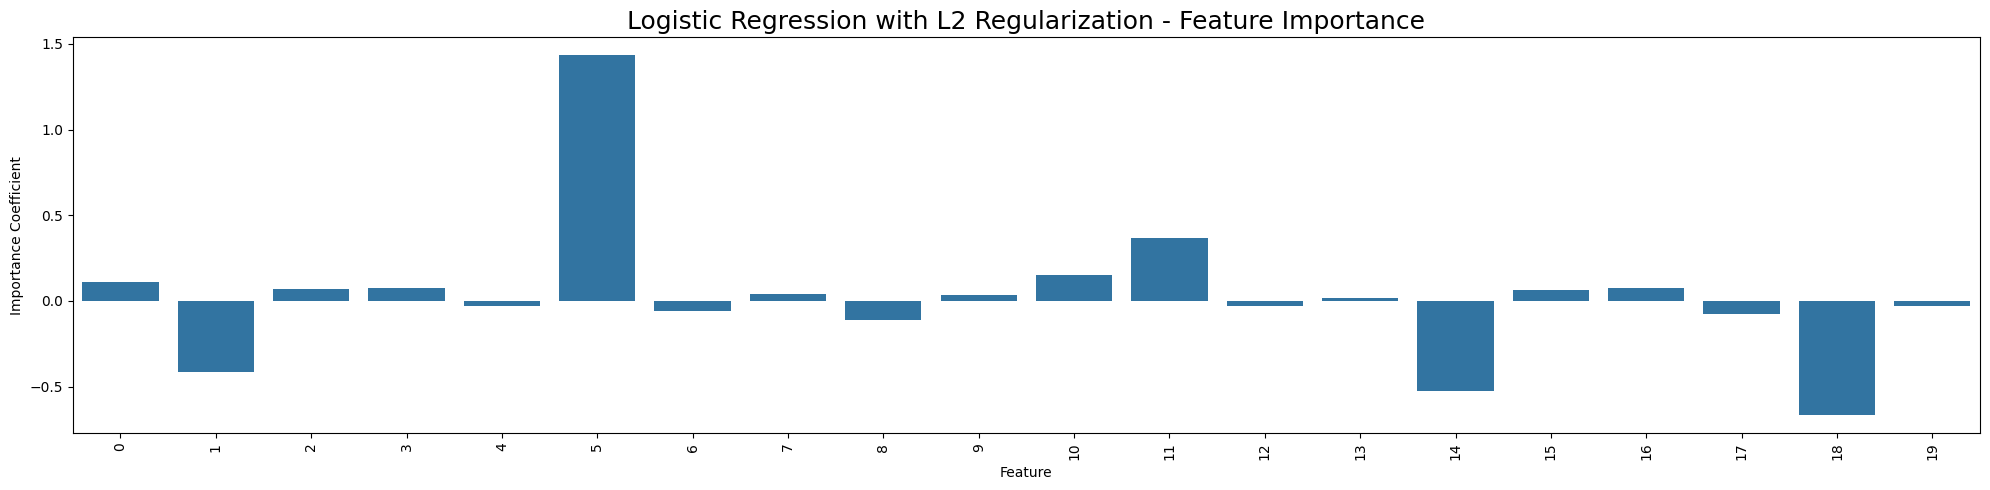

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'coefficients' DataFrame is already defined with columns 'Feature' and 'Importance Coefficient'

# Plotting the coefficients
plt.figure(figsize=(20, 5))
sns.barplot(x='Feature', y='Importance Coefficient', data=coefficients)
plt.title("Logistic Regression with L2 Regularization - Feature Importance", fontsize=18)
plt.xlabel("Feature")
plt.ylabel("Importance Coefficient")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

HPERPARAMETER TUNING

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

# Assuming x and y are your feature and target variables
# Example: x = np.array([[...], [...], ...])
#          y = np.array([...])

# Check for NaN or infinite values in X and y
if np.isnan(X).any() or np.isnan(y).any() or np.isinf(X).any() or np.isinf(y).any():
    raise ValueError("Input data contains NaN or infinite values.")

# Define parameter grid for RandomizedSearchCV
param_test = {
    'max_depth': range(3, 10, 2),
    'min_child_weight': range(1, 6, 2),
    'n_estimators': range(60, 130, 10),
    'learning_rate': [0.05, 0.1, 0.125, 0.2],
    'colsample_bytree': [i/10.0 for i in range(7, 10)]
}

# Initialize XGBRegressor (for regression tasks)
xgb_model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                         colsample_bynode=1, max_delta_step=0,
                         missing=None, n_jobs=-1,
                         nthread=None, objective='reg:squarederror',  # Use 'reg:squarederror' for regression
                         random_state=42,
                         reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None)

# Initialize RandomizedSearchCV
gsearch = RandomizedSearchCV(estimator=xgb_model,
                             param_distributions=param_test,
                             n_iter=20,  # Increase number of iterations
                             scoring='neg_mean_squared_error',  # Use 'neg_mean_squared_error' for regression
                             n_jobs=-1,
                             cv=5,
                             random_state=42)

# Perform RandomizedSearchCV
gsearch.fit(X, y)  # Replace with your actual x and y data

# Print results
print("Best parameters found: ", gsearch.best_params_)
print("Best negative mean squared error: ", -gsearch.best_score_)  # Negate for MSE
print("All results: ", gsearch.cv_results_)

Best parameters found:  {'n_estimators': 60, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Best negative mean squared error:  nan
All results:  {'mean_fit_time': array([0.24739008, 1.17578516, 0.2339282 , 0.24410882, 0.5506021 ,
       2.92613225, 1.9893528 , 0.50671177, 1.37749152, 1.38403659,
       0.88634658, 0.84780803, 0.20830512, 0.44906387, 1.14015636,
       0.5377327 , 0.82699504, 0.98136554, 2.36948452, 0.1274673 ]), 'std_fit_time': array([0.06089271, 0.13318684, 0.05214707, 0.05517291, 0.08783174,
       0.37313039, 0.58743877, 0.03250479, 0.07599969, 0.5061448 ,
       0.12668494, 0.22142277, 0.06347343, 0.08033531, 0.1436516 ,
       0.06000179, 0.14059096, 0.2197636 , 0.57192581, 0.00688325]), 'mean_score_time': array([0.0082746 , 0.00537038, 0.00445461, 0.00472322, 0.00515337,
       0.00852327, 0.00498967, 0.00302505, 0.0052319 , 0.00579948,
       0.00817814, 0.00758753, 0.00345845, 0.00423145, 0.00414543,
       0.0058701 , 0.0

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split data into training set and test set
x_over, x_test, y_over, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBClassifier with selected hyperparameters
cif = XGBClassifier(base_score=0.5, booster="gbtree", colsample_bylevel=1,
                    colsample_bynode=1, colsample_bytree=0.7, gamma=0.2,
                    learning_rate=0.125, max_delta_step=0, max_depth=7,
                    min_child_weight=5, n_estimators=60, n_jobs=1,
                    objective="binary:logistic", random_state=42, reg_alpha=0,
                    reg_lambda=1, scale_pos_weight=1, subsample=0.8,
                    verbosity=1)

# Fit the model on the training data
cif.fit(x_over, y_over)

# Evaluate model accuracy on test set
XGB_test_score = cif.score(x_test, y_test)
print("Model Accuracy: {0}".format(XGB_test_score))

# Predict probabilities
XGB_probs = cif.predict_proba(x_test)[:, 1]

# Calculate ROC AUC score
XGB_roc_value = roc_auc_score(y_test, XGB_probs)
print("XGBOOST ROC AUC value: {0}".format(XGB_roc_value))

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, XGB_probs)

# Find optimal threshold
optimal_threshold = thresholds[np.argmax(tpr - fpr)]
print("XGBOOST Optimal Threshold: {0}".format(optimal_threshold))

Model Accuracy: 0.895
XGBOOST ROC AUC value: 0.9383981509396042
XGBOOST Optimal Threshold: 0.5513140559196472


In [ ]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split data into training set and test set
x_over, x_test, y_over, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBClassifier with selected hyperparameters
cif = XGBClassifier(base_score=0.5, booster="gbtree", colsample_bylevel=1,
                    colsample_bynode=1, colsample_bytree=0.7, gamma=0.2,
                    learning_rate=0.125, max_delta_step=0, max_depth=7,
                    min_child_weight=5, n_estimators=60, n_jobs=1,
                    objective="binary:logistic", random_state=42, reg_alpha=0,
                    reg_lambda=1, scale_pos_weight=1, subsample=0.8,
                    verbosity=1)

# Fit the model on the training data
cif.fit(x_over, y_over)

# Evaluate model accuracy on test set
XGB_test_score = cif.score(x_test, y_test)
print("Model Accuracy: {0}".format(XGB_test_score))

# Predict probabilities
XGB_probs = cif.predict_proba(x_test)[:, 1]

# Calculate ROC AUC score
XGB_roc_value = roc_auc_score(y_test, XGB_probs)
print("XGBOOST ROC AUC value: {0}".format(XGB_roc_value))

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, XGB_probs)

# Find optimal threshold
optimal_threshold = thresholds[np.argmax(tpr - fpr)]
print("XGBOOST Optimal Threshold: {0}".format(optimal_threshold))

# Feature importances
imp_var = cif.feature_importances_

# Get indices of top 3 important features
top_3_indices = np.argsort(imp_var)[-3:][::-1]  # Get indices of top 3 features in descending order

print("Top 3 Important Features:")
print(f"1st: Feature {top_3_indices[0]} with importance {imp_var[top_3_indices[0]]}")
print(f"2nd: Feature {top_3_indices[1]} with importance {imp_var[top_3_indices[1]]}")
print(f"3rd: Feature {top_3_indices[2]} with importance {imp_var[top_3_indices[2]]}")

Model Accuracy: 0.895
XGBOOST ROC AUC value: 0.9383981509396042
XGBOOST Optimal Threshold: 0.5513140559196472
Top 3 Important Features:
1st: Feature 5 with importance 0.21434766054153442
2nd: Feature 18 with importance 0.20994295179843903
3rd: Feature 1 with importance 0.11872097104787827
